In [1]:
run_gridsearch = False
hyperparam_csv_file = "hopland_daily_hyperparams.csv"

In [2]:
import sys
import os
import itertools
current_dir = os.getcwd()
print(current_dir)

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all', '/Users/canruso/Desktop', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python310.zip', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/lib-dynload', '', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages/setuptools/_vendor']


In [4]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

In [5]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'hopland_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("hopland")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all
Train Basin File Exists: True


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("hopland_gage_nlayers.yaml") #update the yaml file for different basins
path_to_physics_data = Path(library_path + "/russian_river_data/Hopland_daily.csv")

In [7]:
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
]

In [8]:
hyperparam_space = {
    "hidden_size": [128, 256],
    "seq_length": [90, 180],
    "num_layers": [1, 2],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 19:55:50,820: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195550/output.log initialized.
2025-02-16 19:55:50,821: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195550
2025-02-16 19:55:50,821: ### Run configurations for testing_run
2025-02-16 19:55:50,821: experiment_name: testing_run
2025-02-16 19:55:50,821: train_basin_file: hopland
2025-02-16 19:55:50,822: validation_basin_file: hopland
2025-02-16 19:55:50,822: test_basin_file: hopland
2025-02-16 19:55:50,822: train_start_date: 1994-10-01 00:00:00
2025-02-16 19:55:50,823: train_end_date: 2002-09-30 00:00:00
2025-02-16 19:55:50,823: validation_start_date: 2002-10-01 00:00:00
2025-02-16 19:55:50,823: validation_end_date: 2005-09-30 00:00:00
2025-02-16 19:55:50,

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]
2025-02-16 19:56:15,153: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195550/validation/model_epoch016/validation_metrics.csv
2025-02-16 19:56:15,155: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195550/validation/model_epoch016/validation_results.p
got predictions


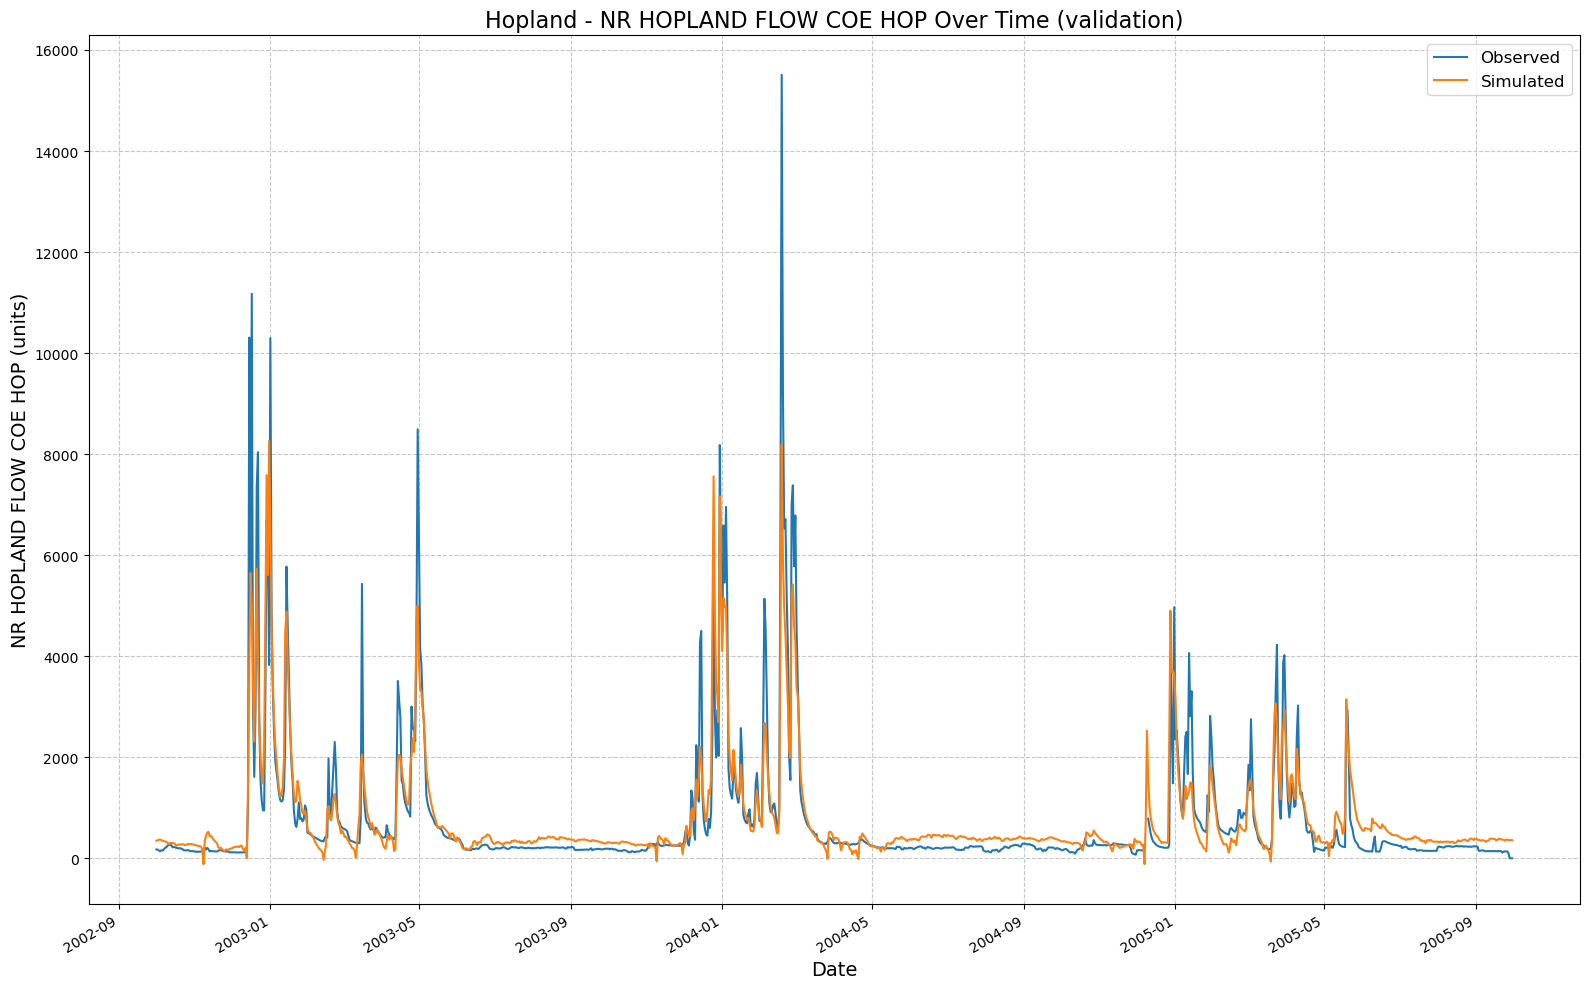

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195550/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 19:56:15,401: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195615/output.log initialized.
2025-02-16 19:56:15,401: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195615
2025-02-16 19:56:15,402: ### Run configurations for testing_run
2025-02-16 19:56:15,402: experiment_name: testing_run
2025-02-16 19:56:15,402: train_basin_file: hopland
2025-02-16 19:56:15,403: validation_basin_file: hopland
2025-02-16 19:56:15,403: test_basin_file: hopland
2025-02-16 19:56:15,403: train_start_date: 1994-10-01 00:00:00
2025-02-16 19:56:15,403: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.88it/s]
2025-02-16 19:56:15,512: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1131.15it/s]
2025-02-16 19:56:15,517: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  7.76it/s, Loss: 0.0000]
2025-02-16 19:56:17,079: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  8.62it/s, Loss: 0.0000]
2025-02-16 19:56:18,358: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.84it/s, Loss: 0.0000]
2025-02-16 19:56:19,970: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  8.89it/s, Loss: 0.0000]
2025-02-16 19:56:21,210: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  8.91it/s, Loss: 0.0000]
2025-02-16 19:56:22,448: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]
2025-02-16 19:56:59,607: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195615/validation/model_epoch032/validation_metrics.csv
2025-02-16 19:56:59,608: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195615/validation/model_epoch032/validation_results.p
got predictions


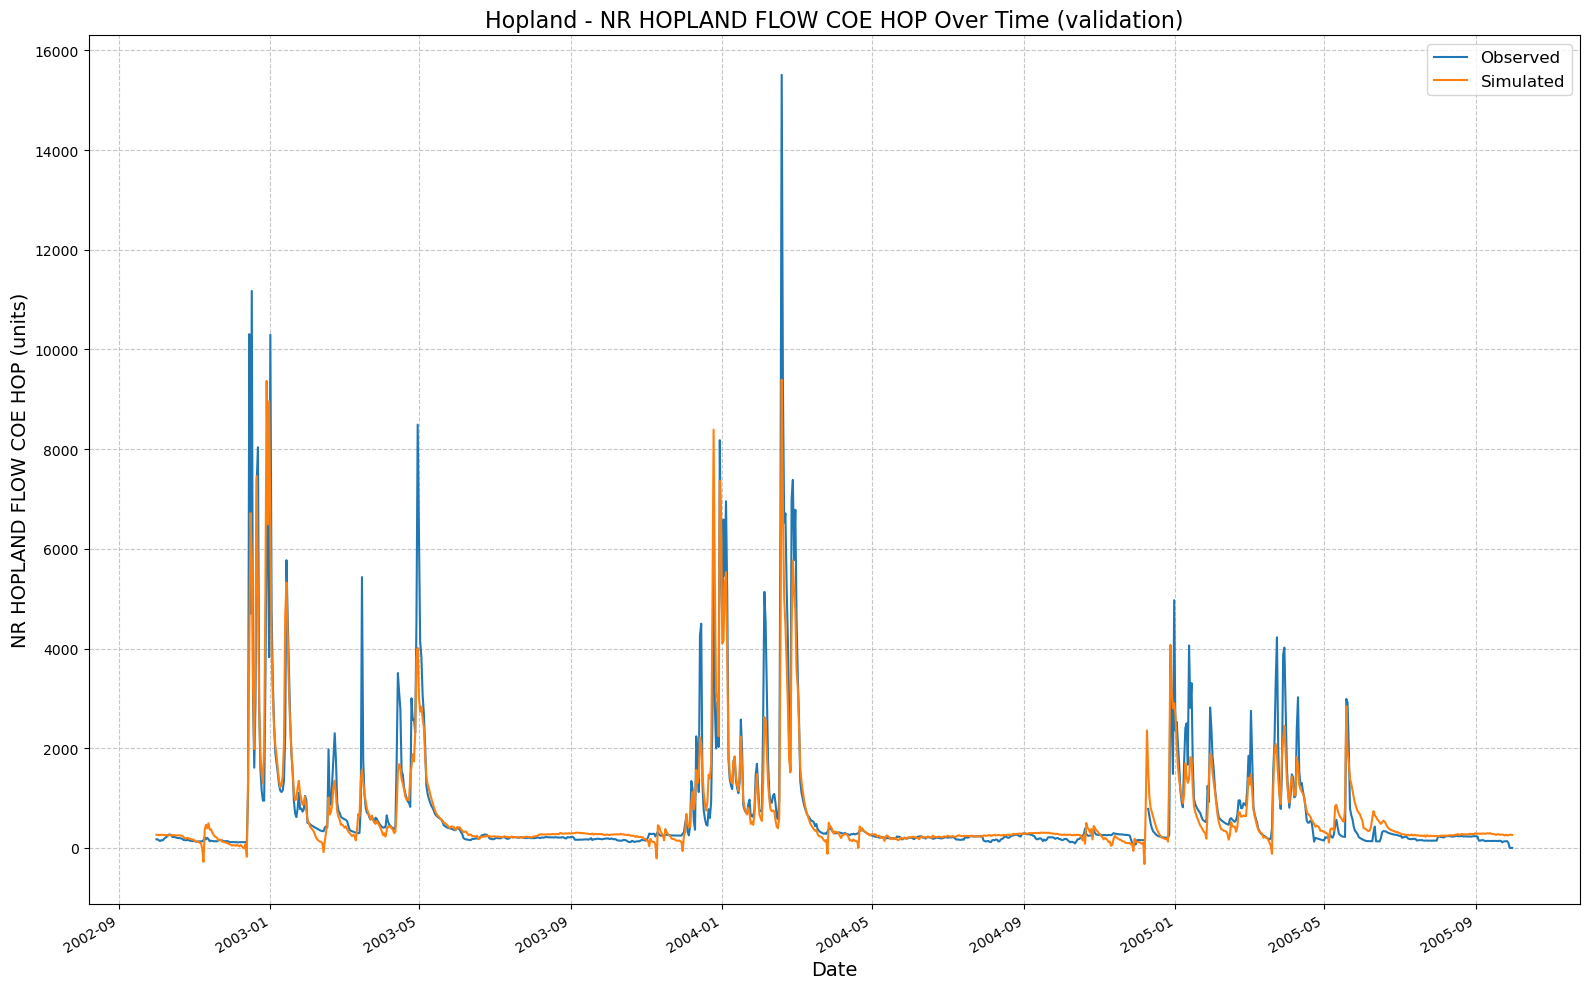

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195615/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 19:56:59,844: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195659/output.log initialized.
2025-02-16 19:56:59,844: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195659
2025-02-16 19:56:59,845: ### Run configurations for testing_run
2025-02-16 19:56:59,845: experiment_name: testing_run
2025-02-16 19:56:59,846: train_basin_file: hopland
2025-02-16 19:56:59,846: validation_basin_file: hopland
2025-02-16 19:56:59,846: test_basin_file: hopland
2025-02-16 19:56:59,846: train_start_date: 1994-10-01 00:00:00
2025-02-16 19:56:59,847: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]
2025-02-16 19:56:59,955: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1086.89it/s]
2025-02-16 19:56:59,959: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  9.02it/s, Loss: 0.0000]
2025-02-16 19:57:01,287: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  8.62it/s, Loss: 0.0000]
2025-02-16 19:57:02,567: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  7.93it/s, Loss: 0.0000]
2025-02-16 19:57:03,958: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  7.94it/s, Loss: 0.0000]
2025-02-16 19:57:05,345: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  9.08it/s, Loss: 0.0000]
2025-02-16 19:57:06,560: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-02-16 19:57:21,402: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195659/validation/model_epoch016/validation_metrics.csv
2025-02-16 19:57:21,402: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195659/validation/model_epoch016/validation_results.p
got predictions


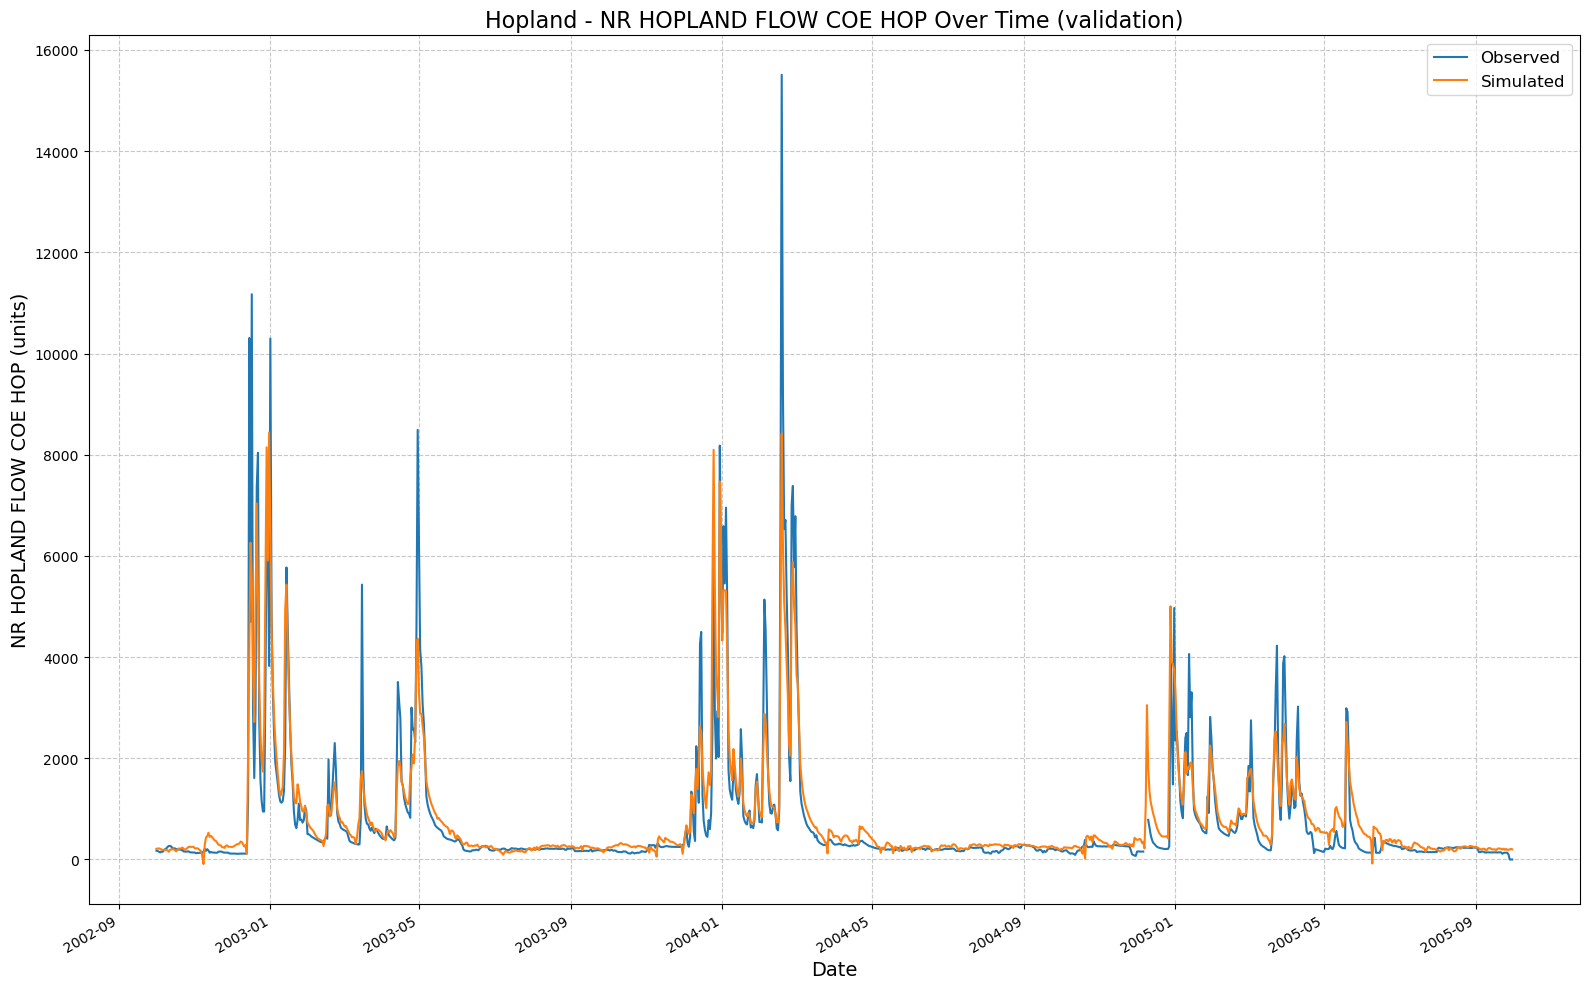

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195659/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 19:57:21,638: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195721/output.log initialized.
2025-02-16 19:57:21,639: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195721
2025-02-16 19:57:21,639: ### Run configurations for testing_run
2025-02-16 19:57:21,640: experiment_name: testing_run
2025-02-16 19:57:21,640: train_basin_file: hopland
2025-02-16 19:57:21,641: validation_basin_file: hopland
2025-02-16 19:57:21,641: test_basin_file: hopland
2025-02-16 19:57:21,641: train_start_date: 1994-10-01 00:00:00
2025-02-16 19:57:21,642: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.00it/s]
2025-02-16 19:57:21,746: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1181.83it/s]
2025-02-16 19:57:21,750: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  9.67it/s, Loss: 0.0000]
2025-02-16 19:57:22,991: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  9.07it/s, Loss: 0.0000]
2025-02-16 19:57:24,205: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  8.40it/s, Loss: 0.0000]
2025-02-16 19:57:25,522: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00, 10.02it/s, Loss: 0.0000]
2025-02-16 19:57:26,622: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  9.31it/s, Loss: 0.0000]
2025-02-16 19:57:27,806: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]
2025-02-16 19:58:02,568: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195721/validation/model_epoch032/validation_metrics.csv
2025-02-16 19:58:02,569: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195721/validation/model_epoch032/validation_results.p
got predictions


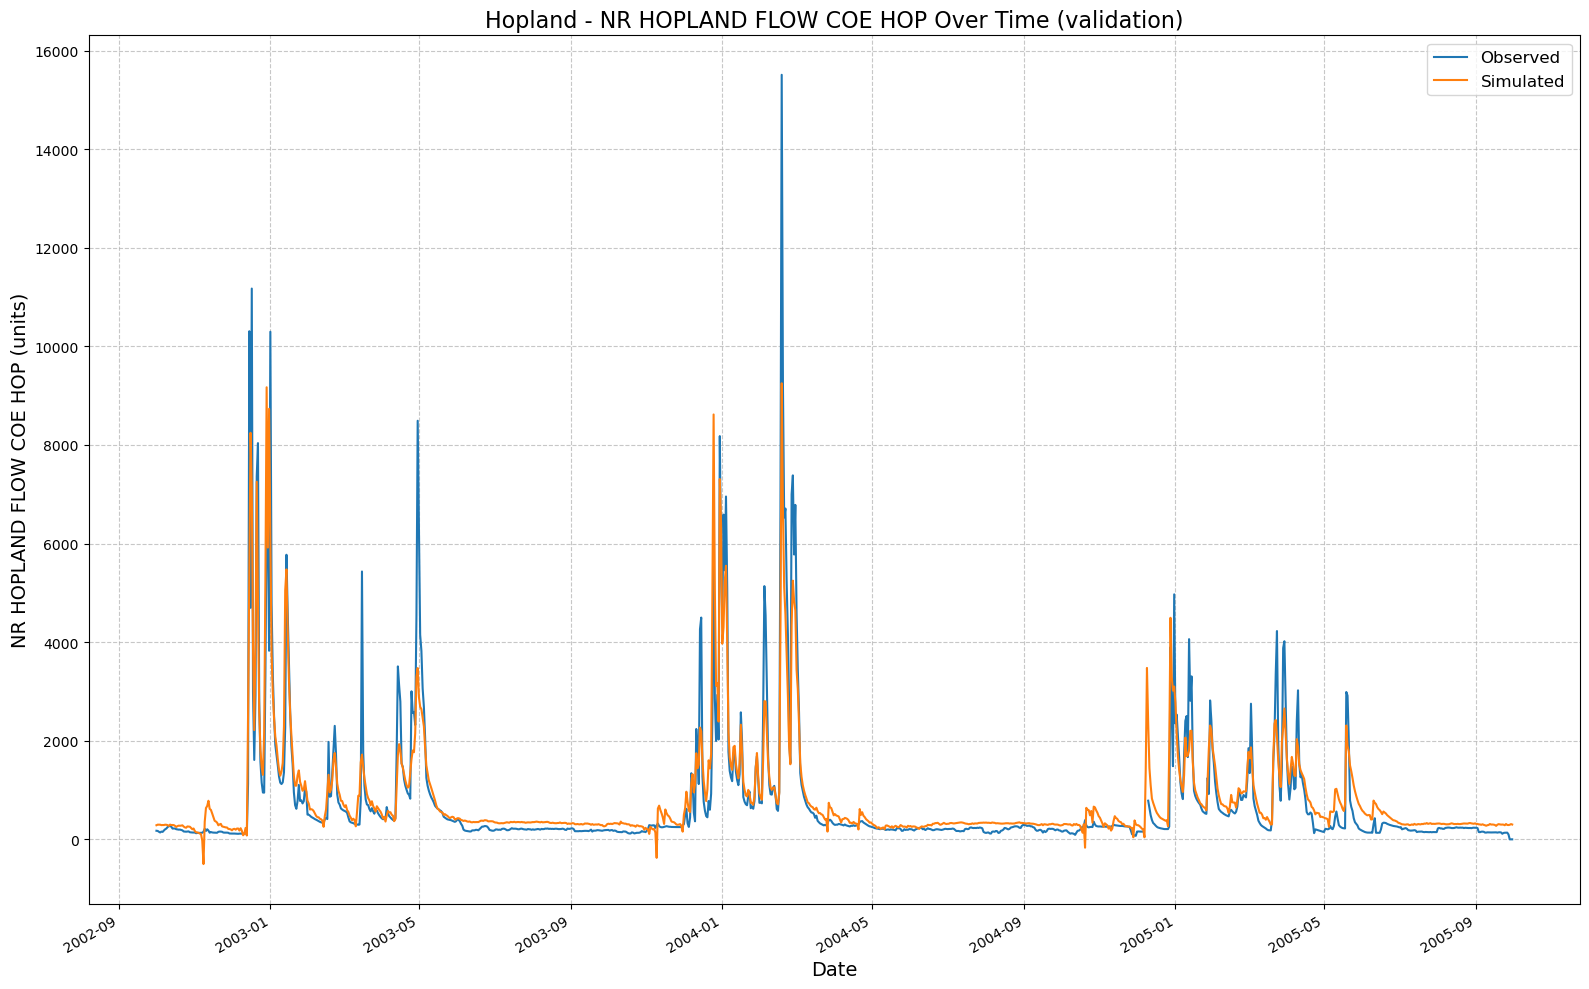

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195721/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 19:58:02,829: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195802/output.log initialized.
2025-02-16 19:58:02,830: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195802
2025-02-16 19:58:02,830: ### Run configurations for testing_run
2025-02-16 19:58:02,831: experiment_name: testing_run
2025-02-16 19:58:02,831: train_basin_file: hopland
2025-02-16 19:58:02,832: validation_basin_file: hopland
2025-02-16 19:58:02,832: test_basin_file: hopland
2025-02-16 19:58:02,833: train_start_date: 1994-10-01 00:00:00
2025-02-16 19:58:02,833: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  8.51it/s]
2025-02-16 19:58:02,986: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 986.20it/s]
2025-02-16 19:58:02,992: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.08it/s, Loss: 0.0000]
2025-02-16 19:58:05,826: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.70it/s, Loss: 0.0000]
2025-02-16 19:58:08,171: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.36it/s, Loss: 0.0000]
2025-02-16 19:58:10,696: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s, Loss: 0.0000]
2025-02-16 19:58:13,231: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.65it/s, Loss: 0.0000]
2025-02-16 19:58:15,602: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]
2025-02-16 19:58:43,751: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195802/validation/model_epoch016/validation_metrics.csv
2025-02-16 19:58:43,752: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195802/validation/model_epoch016/validation_results.p
got predictions


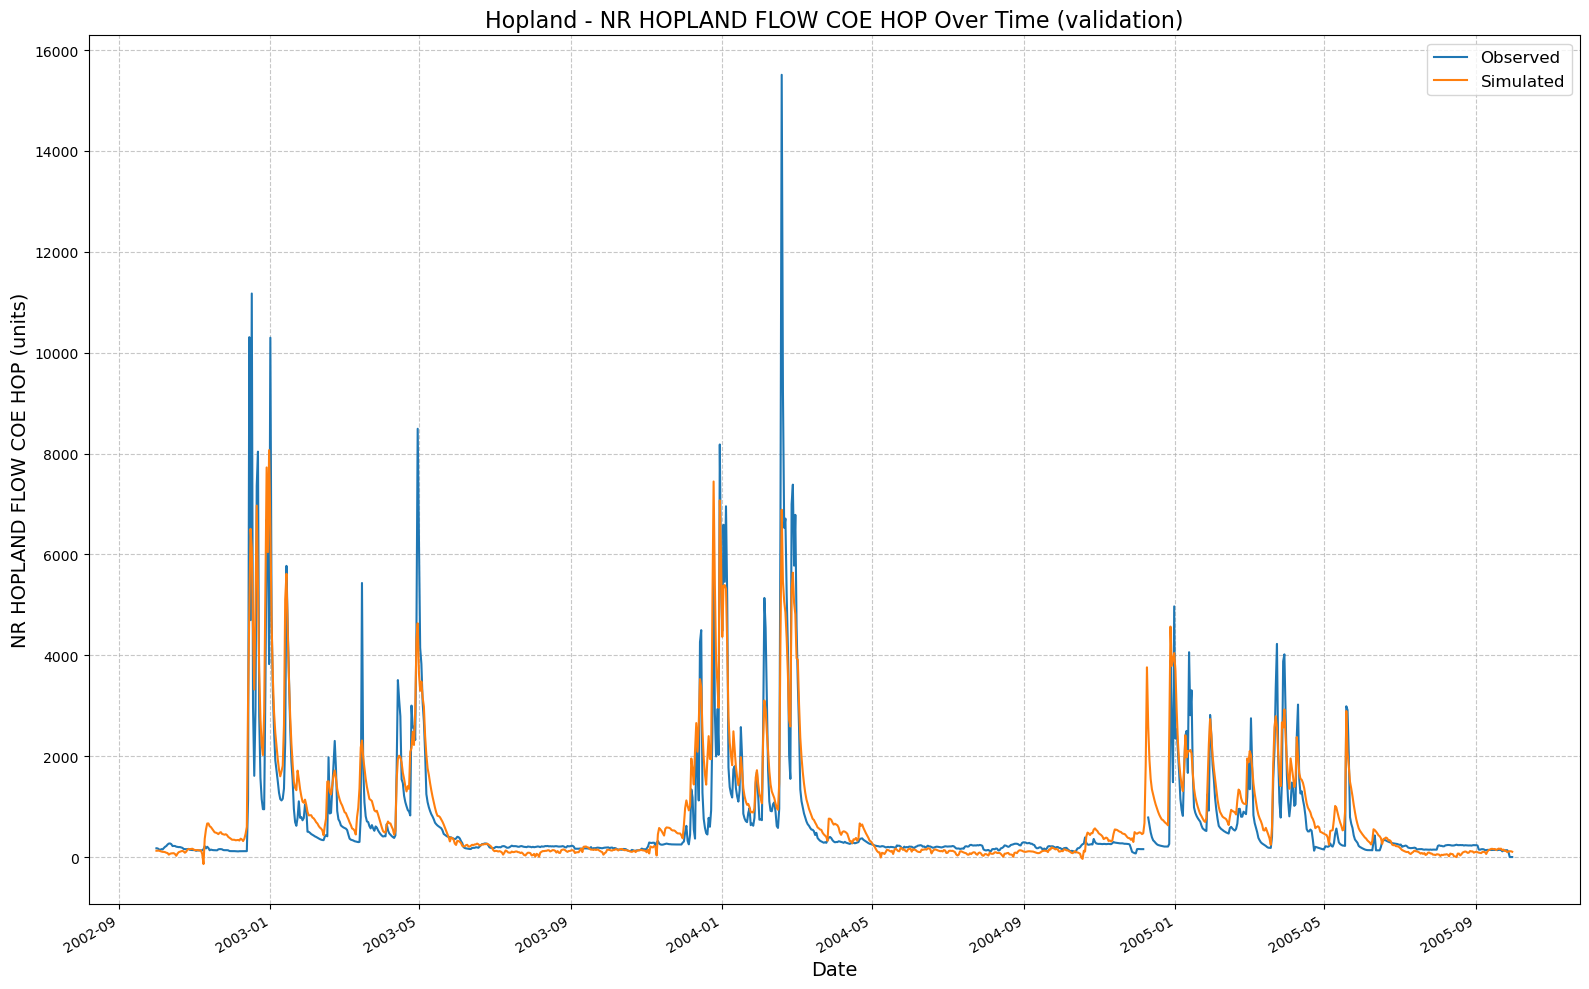

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195802/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 19:58:43,988: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195843/output.log initialized.
2025-02-16 19:58:43,988: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195843
2025-02-16 19:58:43,989: ### Run configurations for testing_run
2025-02-16 19:58:43,989: experiment_name: testing_run
2025-02-16 19:58:43,989: train_basin_file: hopland
2025-02-16 19:58:43,990: validation_basin_file: hopland
2025-02-16 19:58:43,990: test_basin_file: hopland
2025-02-16 19:58:43,991: train_start_date: 1994-10-01 00:00:00
2025-02-16 19:58:43,991: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.79it/s]
2025-02-16 19:58:44,102: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1233.26it/s]
2025-02-16 19:58:44,106: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.59it/s, Loss: 0.0000]
2025-02-16 19:58:46,611: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.75it/s, Loss: 0.0000]
2025-02-16 19:58:48,930: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.71it/s, Loss: 0.0000]
2025-02-16 19:58:51,268: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.57it/s, Loss: 0.0000]
2025-02-16 19:58:53,677: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.53it/s, Loss: 0.0000]
2025-02-16 19:58:56,107: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
2025-02-16 20:00:03,660: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195843/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:00:03,660: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195843/validation/model_epoch032/validation_results.p
got predictions


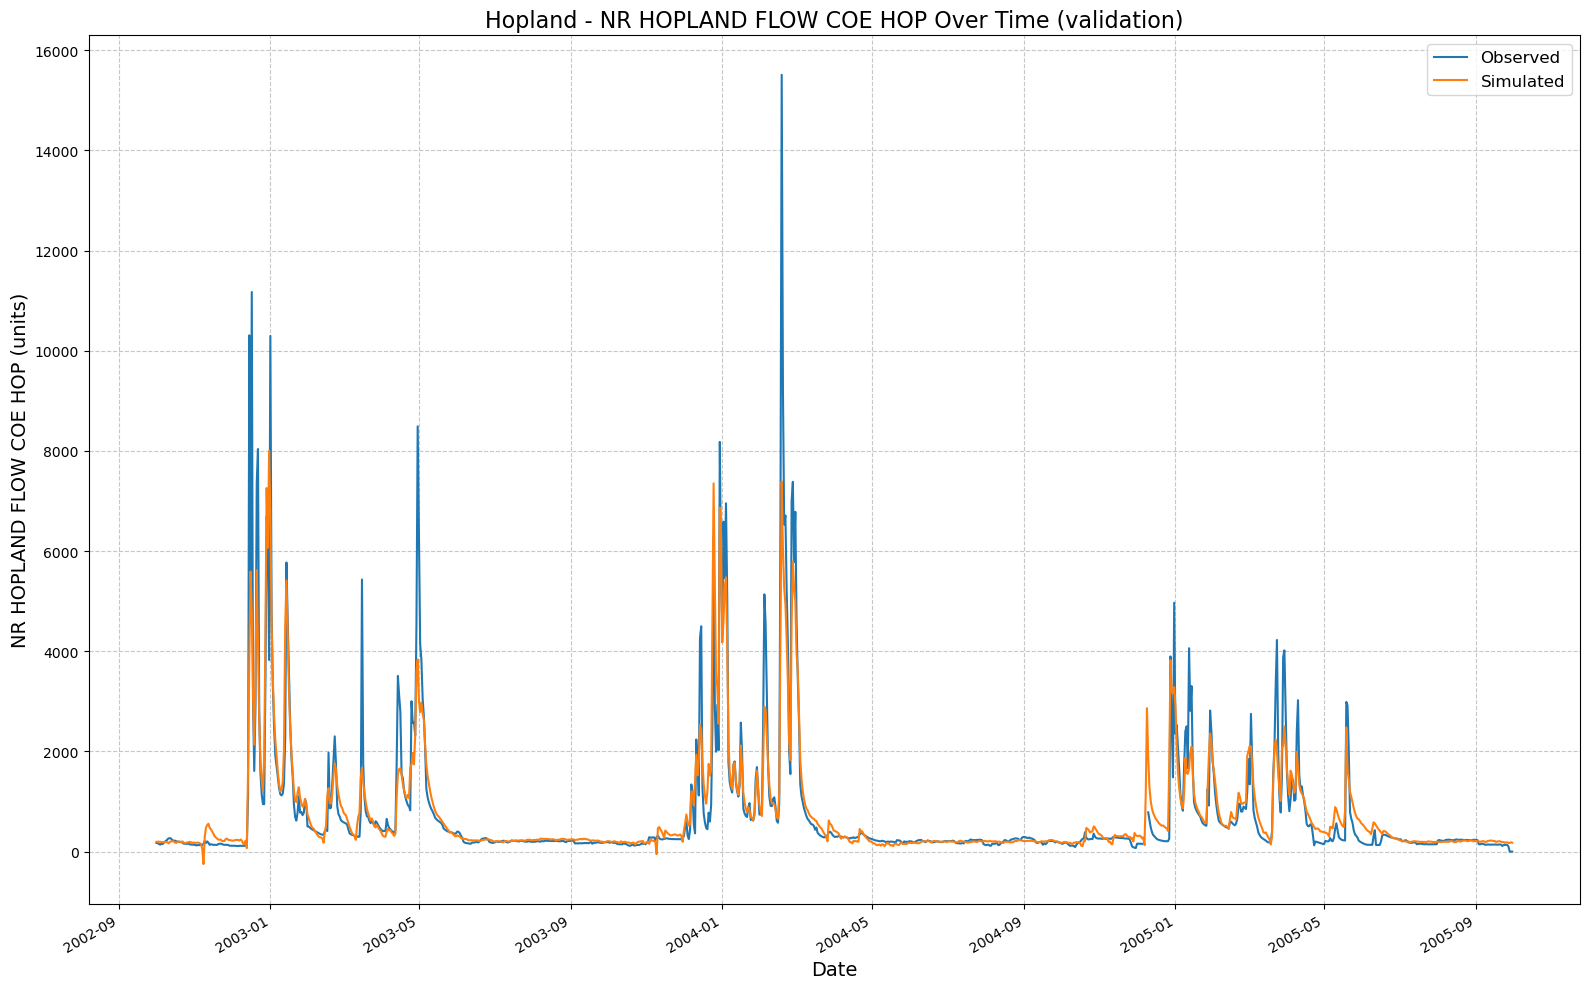

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_195843/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:00:03,903: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200003/output.log initialized.
2025-02-16 20:00:03,904: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200003
2025-02-16 20:00:03,905: ### Run configurations for testing_run
2025-02-16 20:00:03,905: experiment_name: testing_run
2025-02-16 20:00:03,906: train_basin_file: hopland
2025-02-16 20:00:03,906: validation_basin_file: hopland
2025-02-16 20:00:03,907: test_basin_file: hopland
2025-02-16 20:00:03,907: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:00:03,908: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.01it/s]
2025-02-16 20:00:04,036: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1364.00it/s]
2025-02-16 20:00:04,041: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.79it/s, Loss: 0.0000]
2025-02-16 20:00:06,466: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.75it/s, Loss: 0.0000]
2025-02-16 20:00:08,787: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.63it/s, Loss: 0.0000]
2025-02-16 20:00:11,169: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.27it/s, Loss: 0.0000]
2025-02-16 20:00:13,747: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.72it/s, Loss: 0.0000]
2025-02-16 20:00:16,082: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]
2025-02-16 20:00:44,537: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200003/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:00:44,538: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200003/validation/model_epoch016/validation_results.p
got predictions


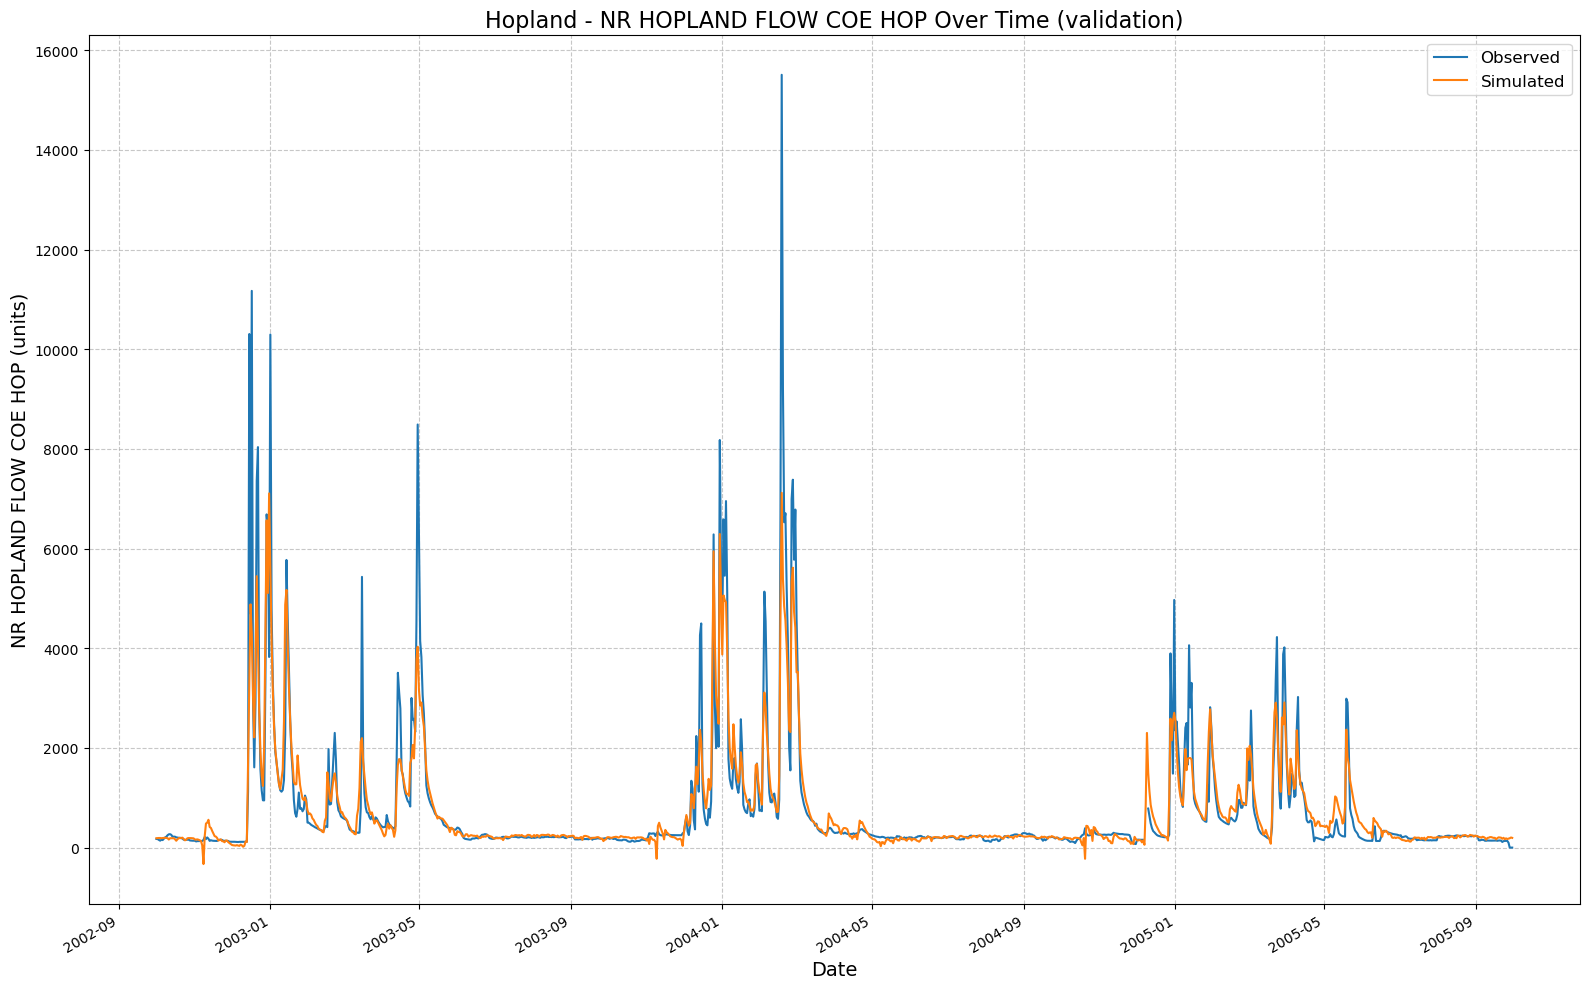

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200003/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:00:44,767: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200044/output.log initialized.
2025-02-16 20:00:44,767: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200044
2025-02-16 20:00:44,767: ### Run configurations for testing_run
2025-02-16 20:00:44,768: experiment_name: testing_run
2025-02-16 20:00:44,768: train_basin_file: hopland
2025-02-16 20:00:44,768: validation_basin_file: hopland
2025-02-16 20:00:44,769: test_basin_file: hopland
2025-02-16 20:00:44,769: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:00:44,769: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.76it/s]
2025-02-16 20:00:44,878: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1494.76it/s]
2025-02-16 20:00:44,882: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.54it/s, Loss: 0.0000]
2025-02-16 20:00:47,414: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.62it/s, Loss: 0.0000]
2025-02-16 20:00:49,800: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s, Loss: 0.0000]
2025-02-16 20:00:52,287: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.52it/s, Loss: 0.0000]
2025-02-16 20:00:54,723: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s, Loss: 0.0000]
2025-02-16 20:00:57,227: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]
2025-02-16 20:02:07,427: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200044/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:02:07,428: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200044/validation/model_epoch032/validation_results.p
got predictions


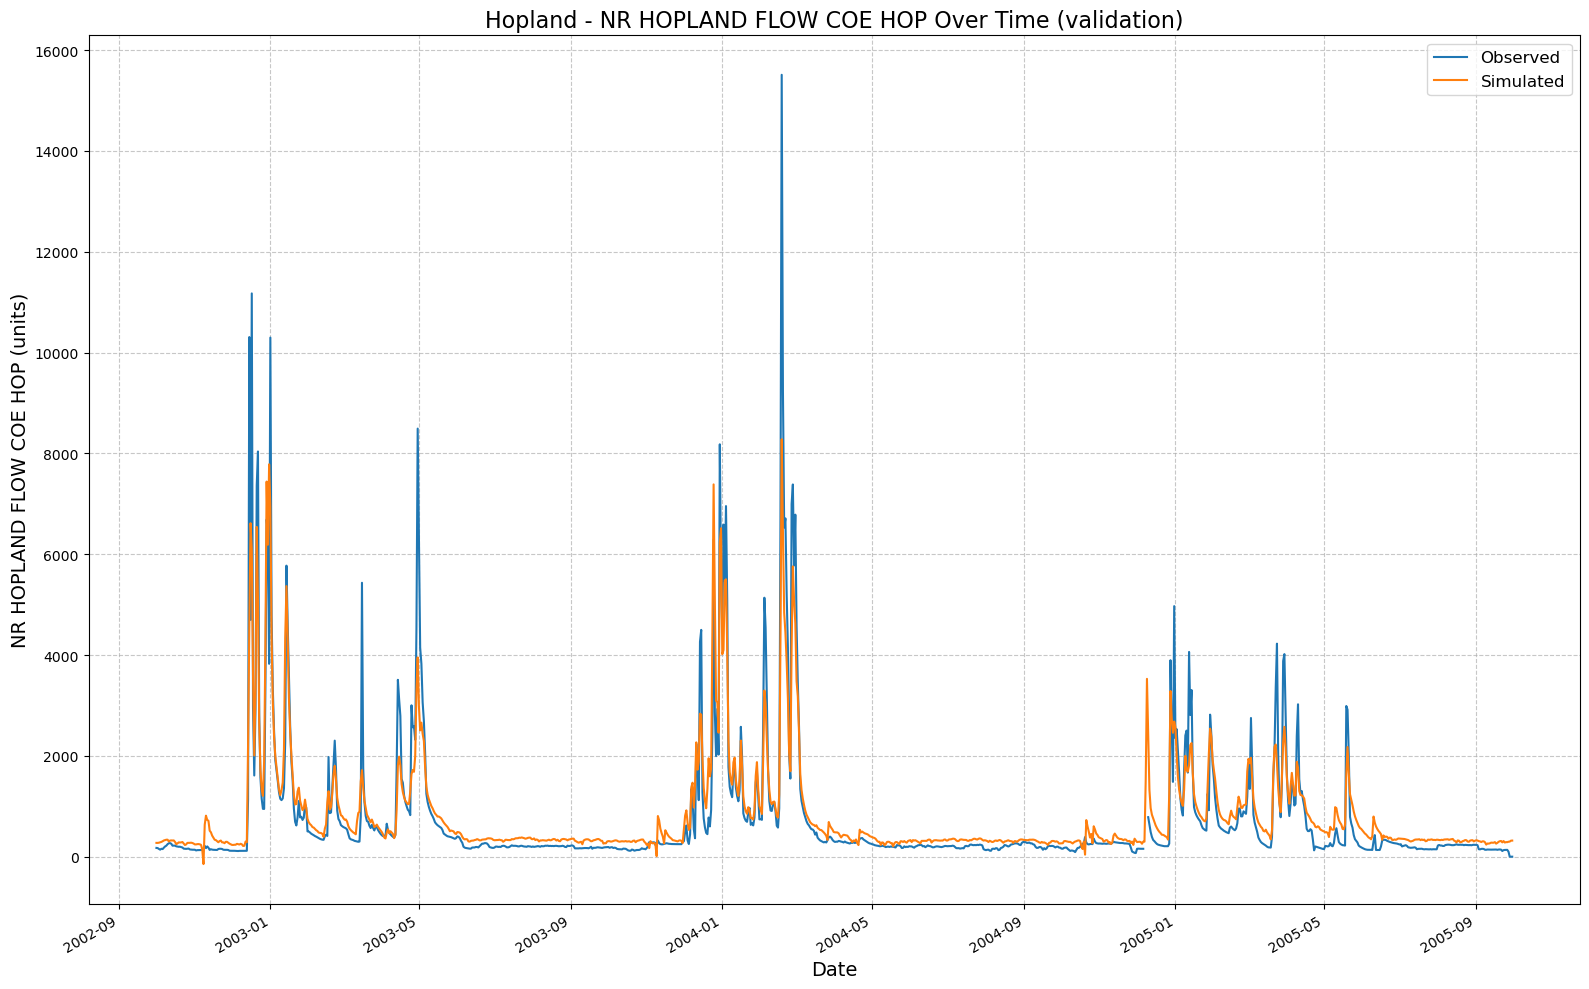

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200044/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:02:07,691: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200207/output.log initialized.
2025-02-16 20:02:07,692: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200207
2025-02-16 20:02:07,692: ### Run configurations for testing_run
2025-02-16 20:02:07,693: experiment_name: testing_run
2025-02-16 20:02:07,693: train_basin_file: hopland
2025-02-16 20:02:07,693: validation_basin_file: hopland
2025-02-16 20:02:07,694: test_basin_file: hopland
2025-02-16 20:02:07,694: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:02:07,695: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  8.98it/s]
2025-02-16 20:02:07,826: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1090.56it/s]
2025-02-16 20:02:07,833: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s, Loss: 0.0000]
2025-02-16 20:02:10,523: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s, Loss: 0.0000]
2025-02-16 20:02:13,178: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.65it/s, Loss: 0.0000]
2025-02-16 20:02:15,547: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.67it/s, Loss: 0.0000]
2025-02-16 20:02:17,908: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.70it/s, Loss: 0.0000]
2025-02-16 20:02:20,253: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]
2025-02-16 20:02:49,006: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200207/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:02:49,007: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200207/validation/model_epoch016/validation_results.p
got predictions


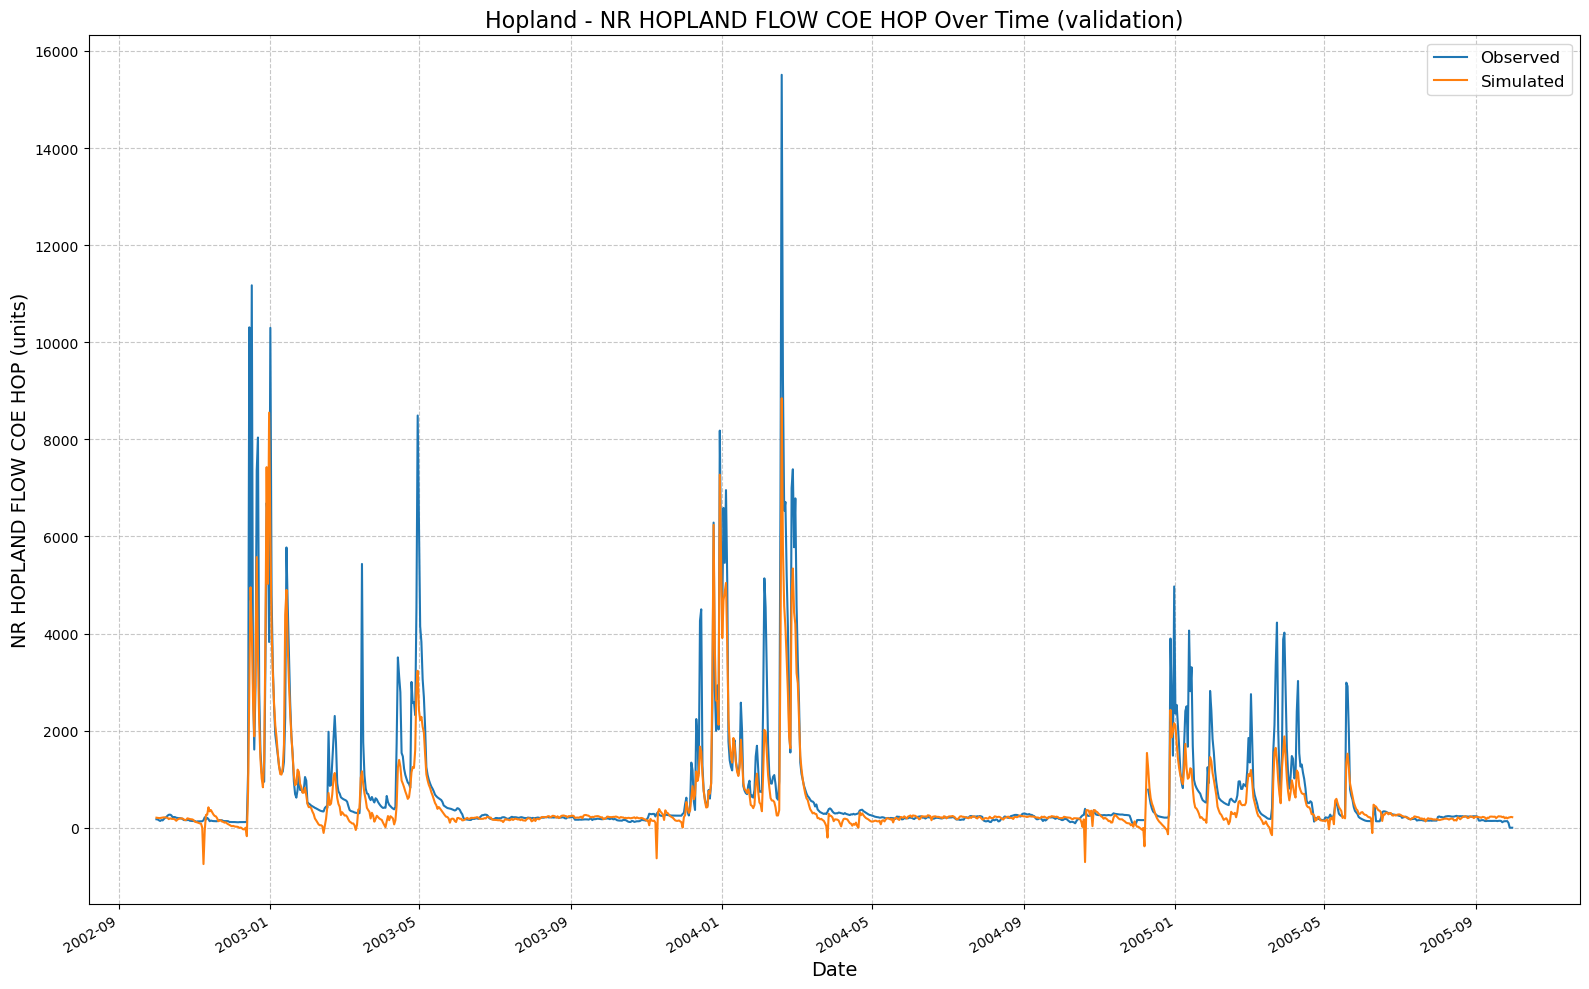

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200207/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:02:49,262: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200249/output.log initialized.
2025-02-16 20:02:49,263: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200249
2025-02-16 20:02:49,263: ### Run configurations for testing_run
2025-02-16 20:02:49,263: experiment_name: testing_run
2025-02-16 20:02:49,264: train_basin_file: hopland
2025-02-16 20:02:49,264: validation_basin_file: hopland
2025-02-16 20:02:49,264: test_basin_file: hopland
2025-02-16 20:02:49,265: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:02:49,265: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.72it/s]
2025-02-16 20:02:49,376: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1295.34it/s]
2025-02-16 20:02:49,381: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.07it/s, Loss: 0.0000]
2025-02-16 20:02:52,196: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.74it/s, Loss: 0.0000]
2025-02-16 20:02:54,520: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.83it/s, Loss: 0.0000]
2025-02-16 20:02:56,799: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.26it/s, Loss: 0.0000]
2025-02-16 20:02:59,385: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.83it/s, Loss: 0.0000]
2025-02-16 20:03:01,663: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]
2025-02-16 20:04:09,985: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200249/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:04:09,986: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200249/validation/model_epoch032/validation_results.p
got predictions


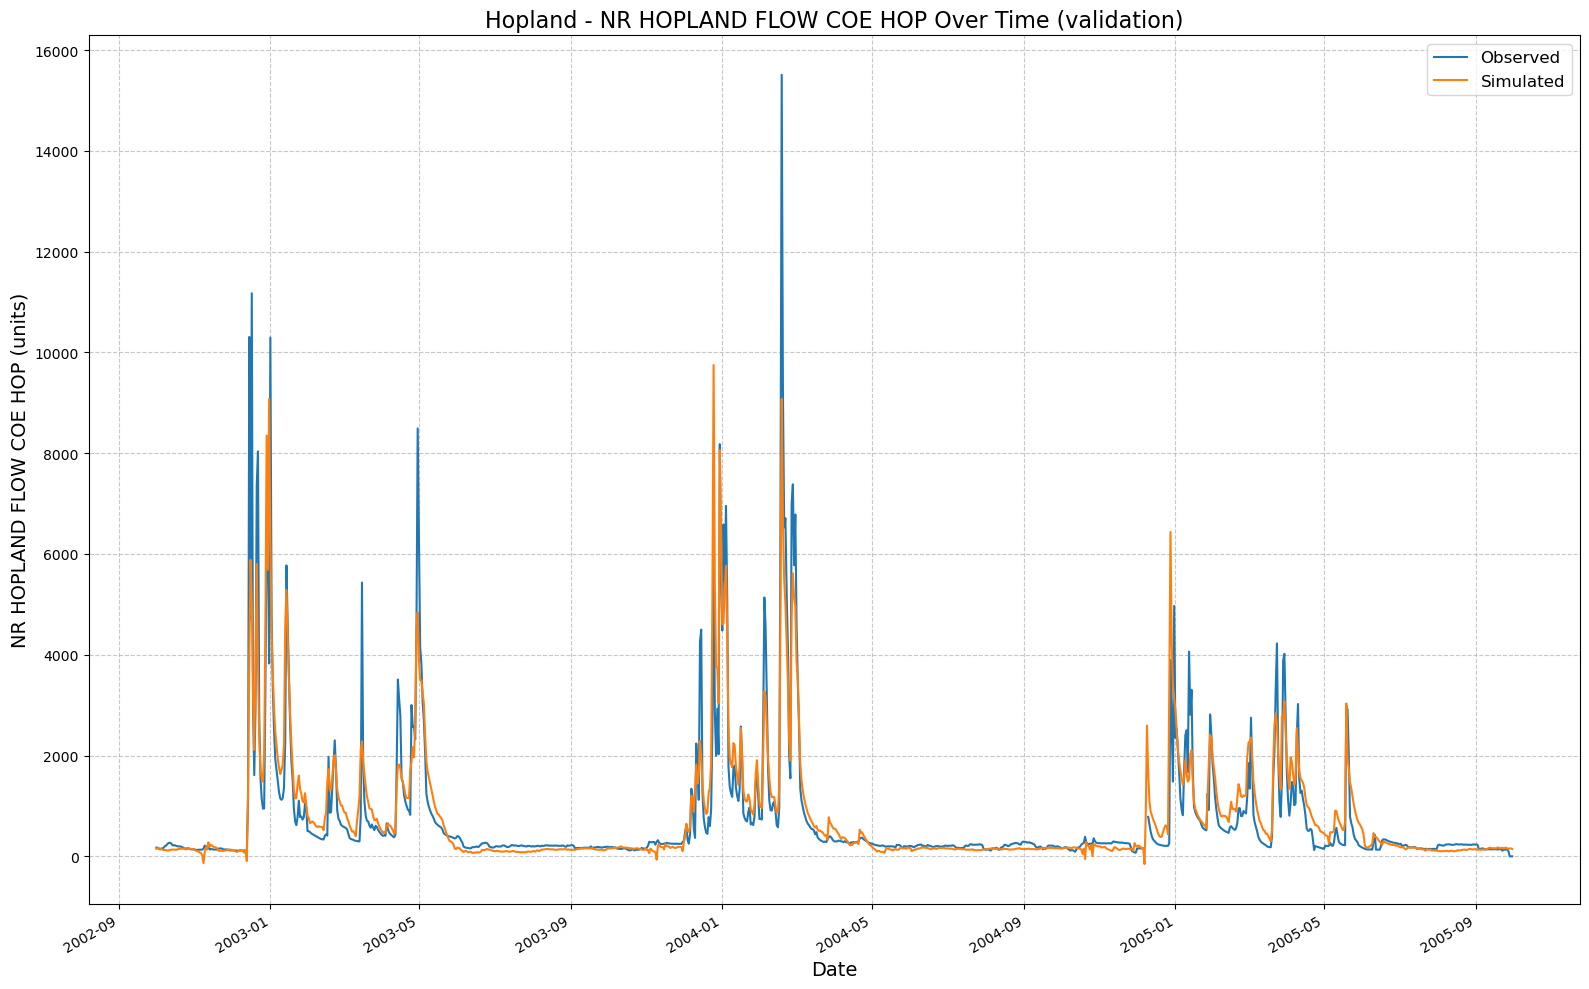

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200249/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:04:10,218: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200410/output.log initialized.
2025-02-16 20:04:10,219: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200410
2025-02-16 20:04:10,219: ### Run configurations for testing_run
2025-02-16 20:04:10,220: experiment_name: testing_run
2025-02-16 20:04:10,220: train_basin_file: hopland
2025-02-16 20:04:10,221: validation_basin_file: hopland
2025-02-16 20:04:10,221: test_basin_file: hopland
2025-02-16 20:04:10,222: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:04:10,222: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.80it/s]
2025-02-16 20:04:10,332: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1557.48it/s]
2025-02-16 20:04:10,336: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.03it/s, Loss: 0.0000]
2025-02-16 20:04:13,202: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.60it/s, Loss: 0.0000]
2025-02-16 20:04:15,596: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.66it/s, Loss: 0.0000]
2025-02-16 20:04:17,960: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.72it/s, Loss: 0.0000]
2025-02-16 20:04:20,294: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.65it/s, Loss: 0.0000]
2025-02-16 20:04:22,662: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]
2025-02-16 20:04:49,730: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200410/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:04:49,731: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200410/validation/model_epoch016/validation_results.p
got predictions


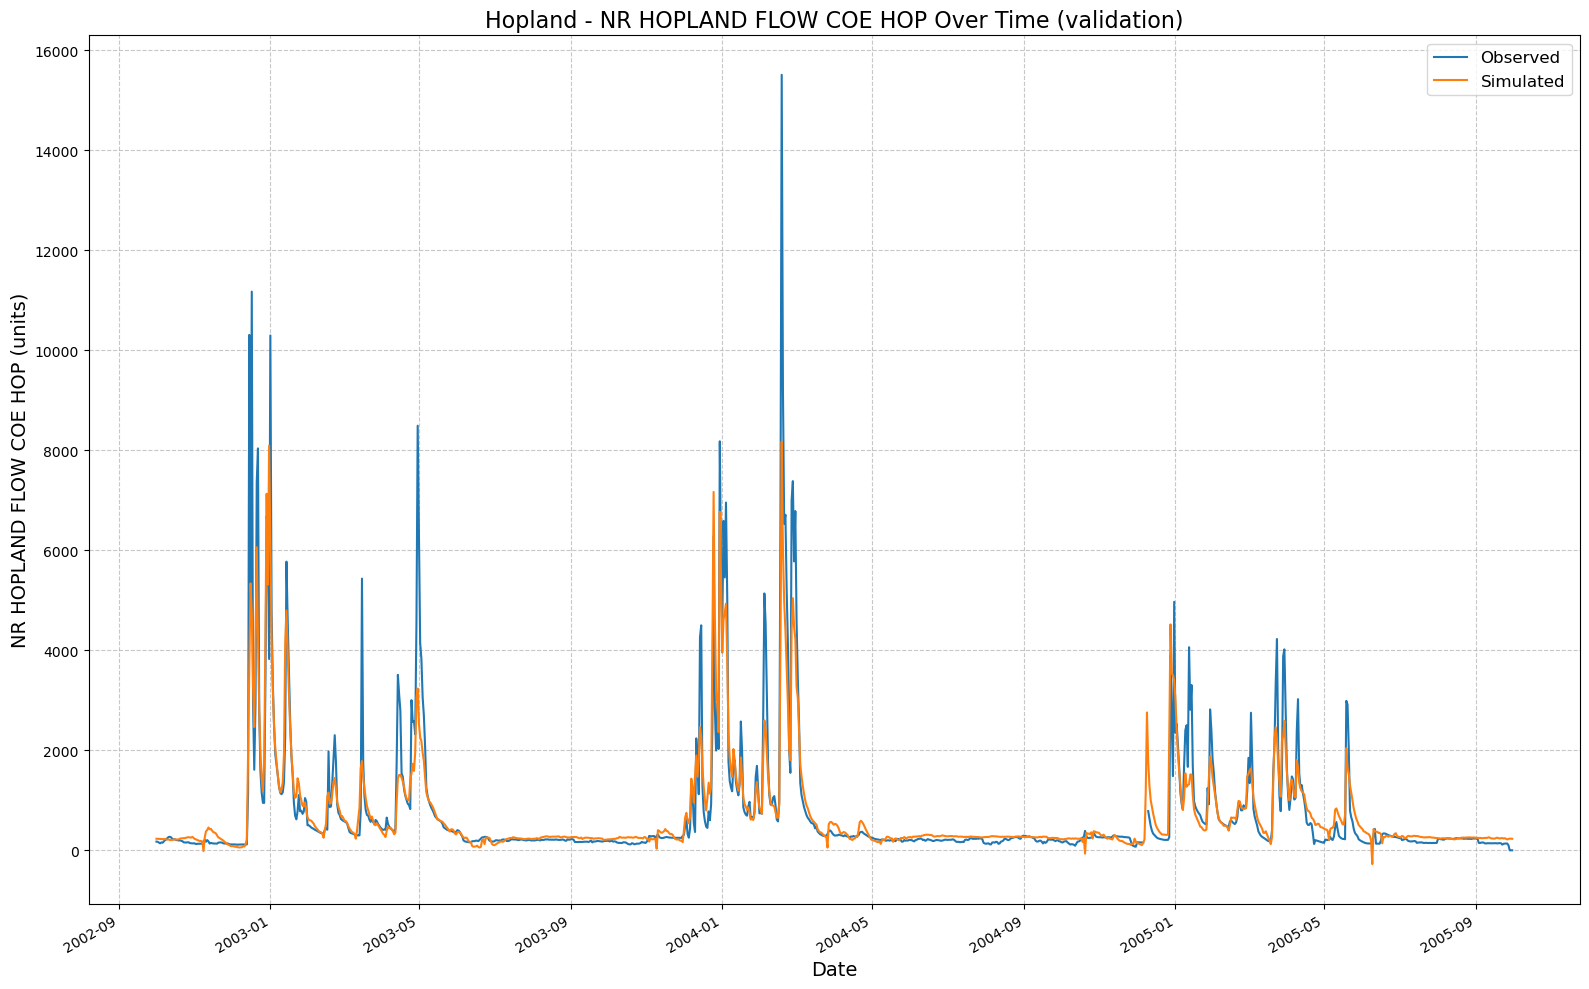

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200410/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:04:49,980: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200449/output.log initialized.
2025-02-16 20:04:49,980: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200449
2025-02-16 20:04:49,980: ### Run configurations for testing_run
2025-02-16 20:04:49,980: experiment_name: testing_run
2025-02-16 20:04:49,981: train_basin_file: hopland
2025-02-16 20:04:49,981: validation_basin_file: hopland
2025-02-16 20:04:49,981: test_basin_file: hopland
2025-02-16 20:04:49,982: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:04:49,982: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
2025-02-16 20:04:50,091: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1294.94it/s]
2025-02-16 20:04:50,095: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.73it/s, Loss: 0.0000]
2025-02-16 20:04:52,529: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  5.02it/s, Loss: 0.0000]
2025-02-16 20:04:54,725: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.82it/s, Loss: 0.0000]
2025-02-16 20:04:57,007: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.25it/s, Loss: 0.0000]
2025-02-16 20:04:59,601: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.71it/s, Loss: 0.0000]
2025-02-16 20:05:01,939: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]
2025-02-16 20:06:08,776: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200449/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:06:08,777: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200449/validation/model_epoch032/validation_results.p
got predictions


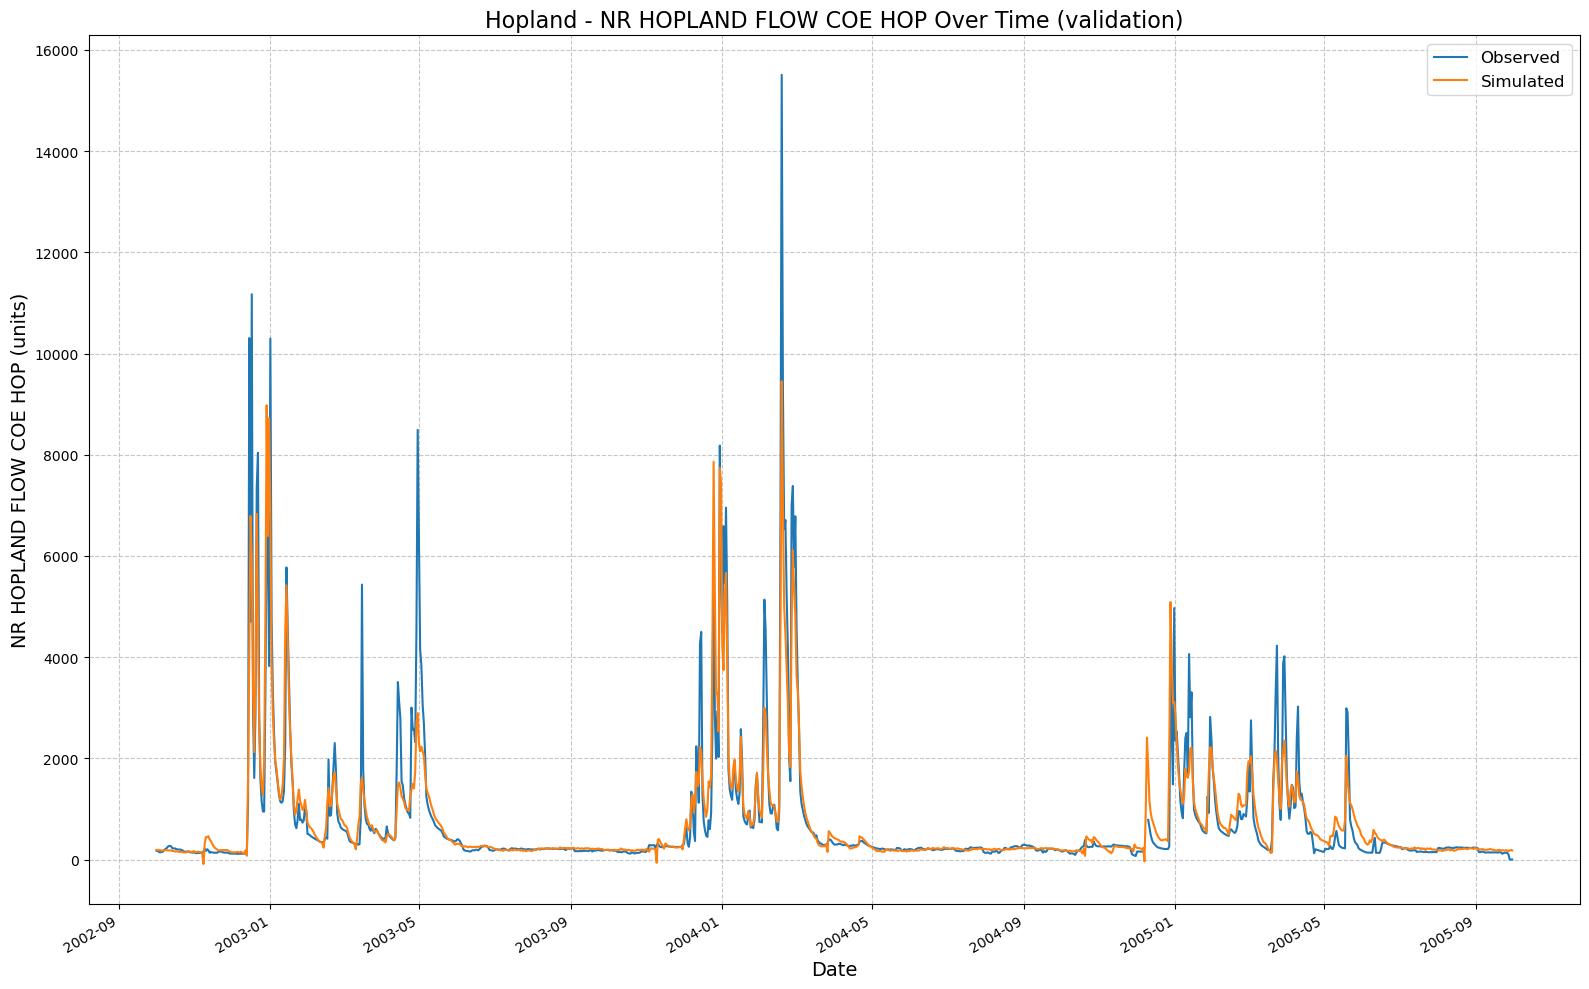

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200449/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:06:09,011: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200609/output.log initialized.
2025-02-16 20:06:09,011: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200609
2025-02-16 20:06:09,012: ### Run configurations for testing_run
2025-02-16 20:06:09,012: experiment_name: testing_run
2025-02-16 20:06:09,012: train_basin_file: hopland
2025-02-16 20:06:09,013: validation_basin_file: hopland
2025-02-16 20:06:09,013: test_basin_file: hopland
2025-02-16 20:06:09,013: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:06:09,014: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.09it/s]
2025-02-16 20:06:09,131: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1295.74it/s]
2025-02-16 20:06:09,135: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.22it/s, Loss: 0.0000]
2025-02-16 20:06:14,221: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s, Loss: 0.0000]
2025-02-16 20:06:19,126: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.31it/s, Loss: 0.0000]
2025-02-16 20:06:23,898: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s, Loss: 0.0000]
2025-02-16 20:06:28,761: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.22it/s, Loss: 0.0000]
2025-02-16 20:06:33,725: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]
2025-02-16 20:07:28,953: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200609/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:07:28,954: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200609/validation/model_epoch016/validation_results.p
got predictions


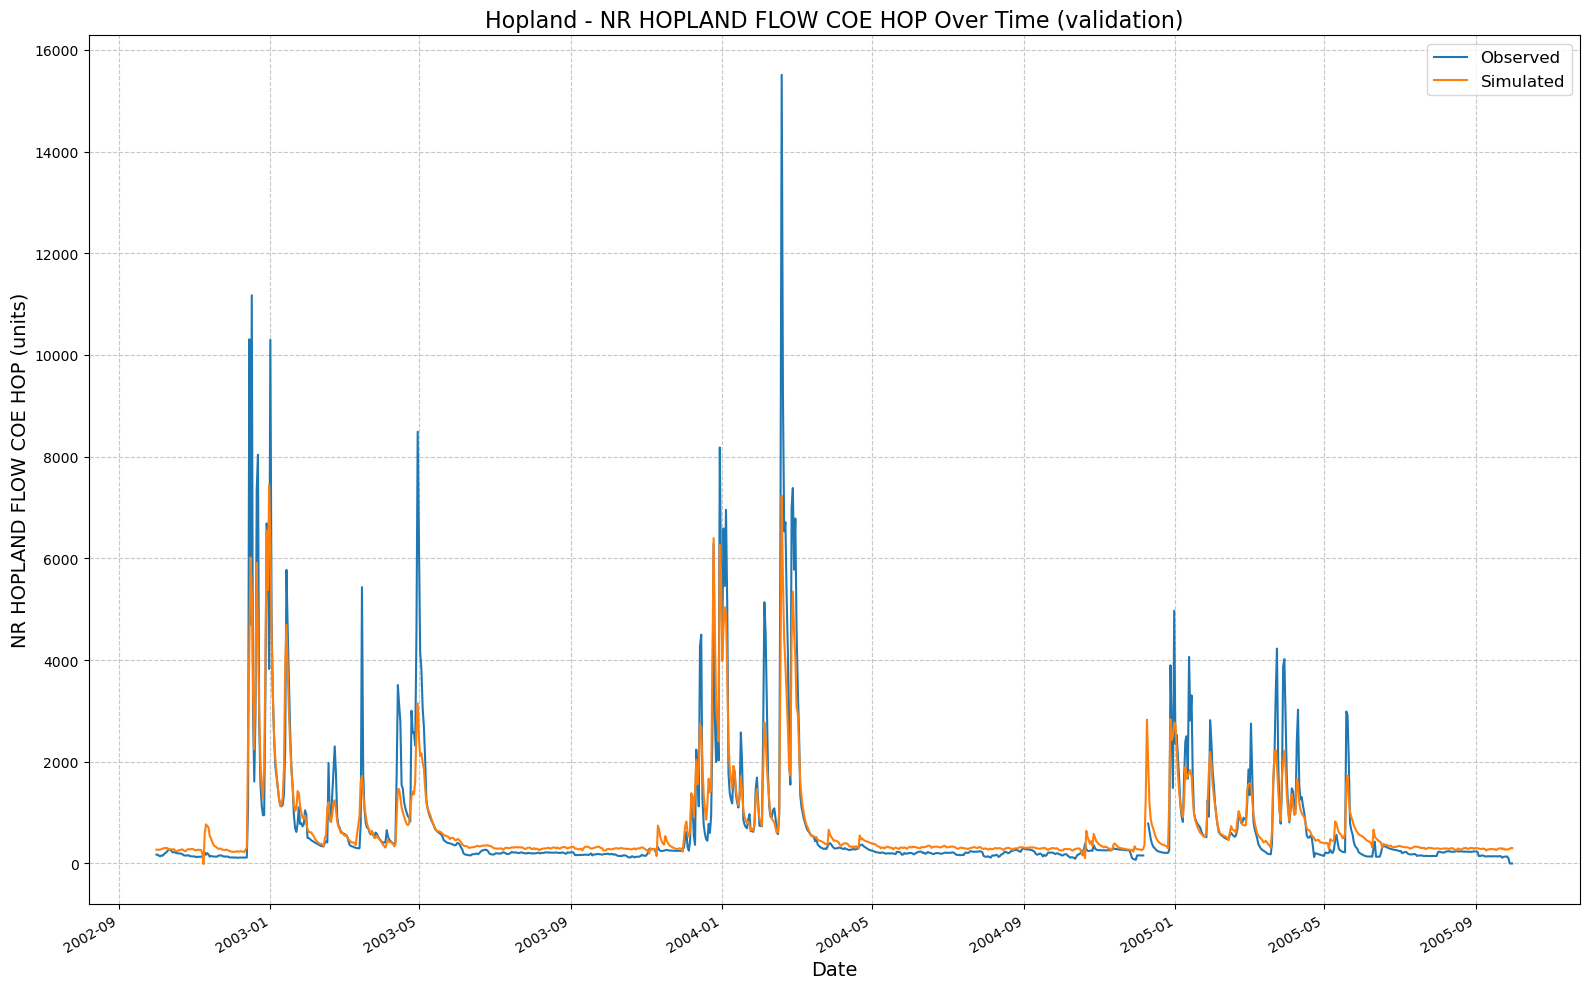

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200609/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:07:29,208: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200729/output.log initialized.
2025-02-16 20:07:29,208: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200729
2025-02-16 20:07:29,208: ### Run configurations for testing_run
2025-02-16 20:07:29,209: experiment_name: testing_run
2025-02-16 20:07:29,209: train_basin_file: hopland
2025-02-16 20:07:29,209: validation_basin_file: hopland
2025-02-16 20:07:29,210: test_basin_file: hopland
2025-02-16 20:07:29,210: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:07:29,210: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  8.40it/s]
2025-02-16 20:07:29,352: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 362.42it/s]
2025-02-16 20:07:29,365: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s, Loss: 0.0000]
2025-02-16 20:07:34,431: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.32it/s, Loss: 0.0000]
2025-02-16 20:07:39,181: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.25it/s, Loss: 0.0000]
2025-02-16 20:07:44,070: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.29it/s, Loss: 0.0000]
2025-02-16 20:07:48,874: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s, Loss: 0.0000]
2025-02-16 20:07:53,518: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
2025-02-16 20:10:10,463: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200729/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:10:10,464: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200729/validation/model_epoch032/validation_results.p
got predictions


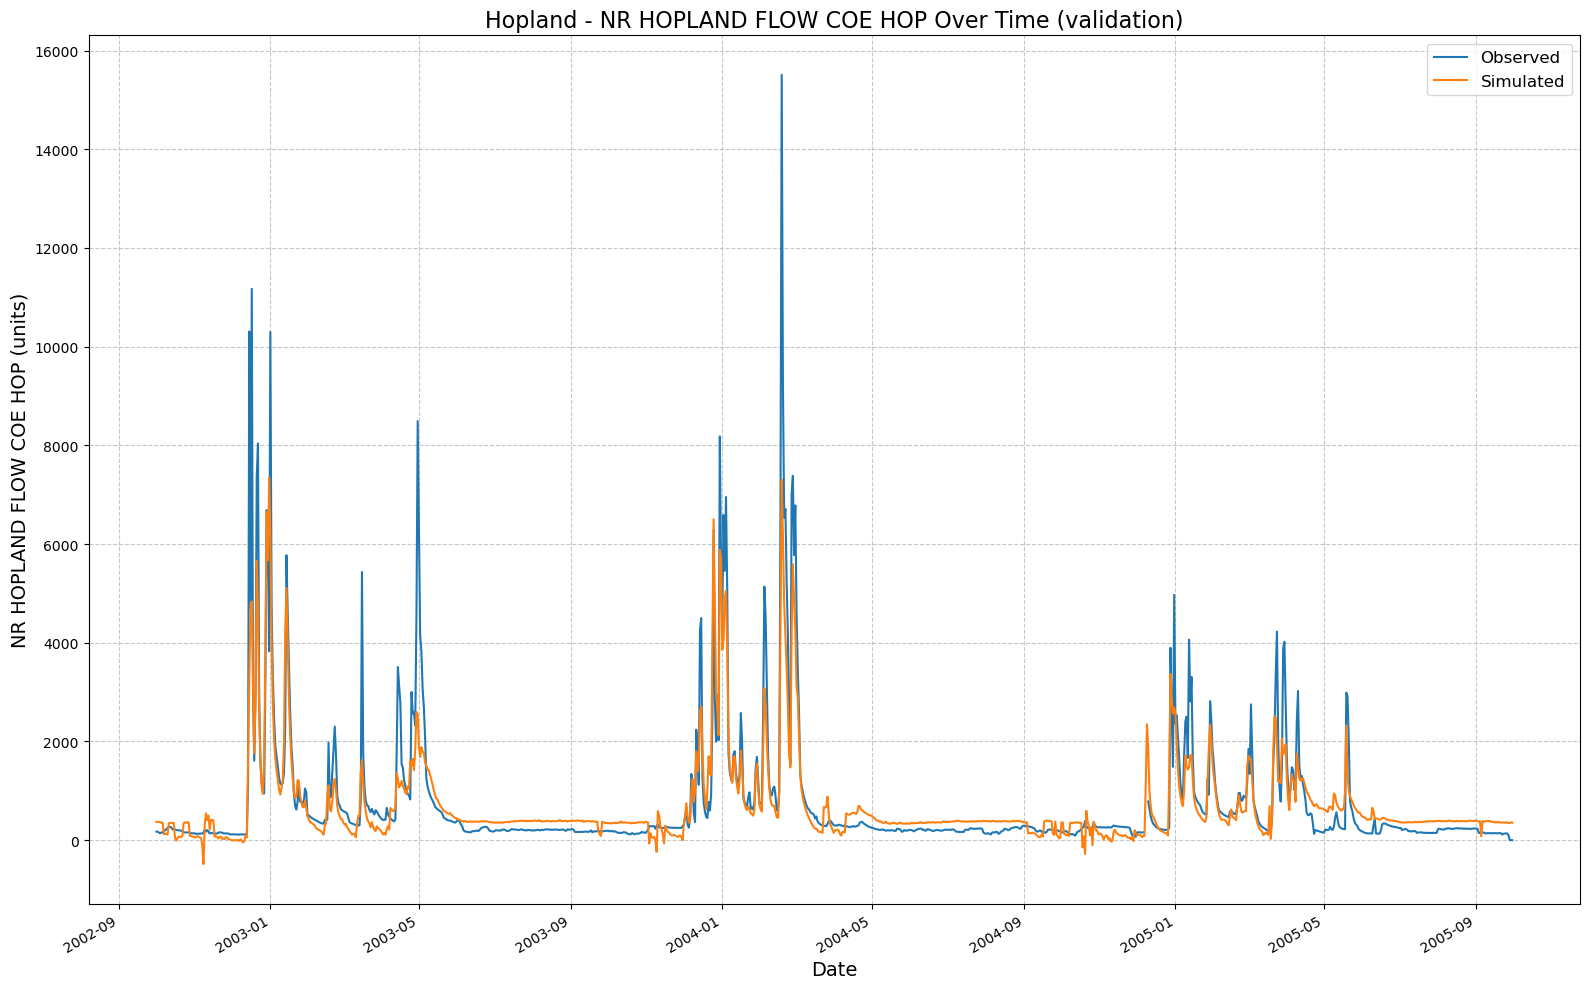

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_200729/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:10:10,708: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201010/output.log initialized.
2025-02-16 20:10:10,708: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201010
2025-02-16 20:10:10,709: ### Run configurations for testing_run
2025-02-16 20:10:10,709: experiment_name: testing_run
2025-02-16 20:10:10,709: train_basin_file: hopland
2025-02-16 20:10:10,710: validation_basin_file: hopland
2025-02-16 20:10:10,710: test_basin_file: hopland
2025-02-16 20:10:10,710: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:10:10,711: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  9.41it/s]
2025-02-16 20:10:10,837: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1216.45it/s]
2025-02-16 20:10:10,844: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s, Loss: 0.0000]
2025-02-16 20:10:15,639: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:05<00:00,  2.16it/s, Loss: 0.0000]
2025-02-16 20:10:20,737: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s, Loss: 0.0000]
2025-02-16 20:10:25,328: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s, Loss: 0.0000]
2025-02-16 20:10:29,868: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.28it/s, Loss: 0.0000]
2025-02-16 20:10:34,701: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]
2025-02-16 20:11:34,292: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201010/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:11:34,293: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201010/validation/model_epoch016/validation_results.p
got predictions


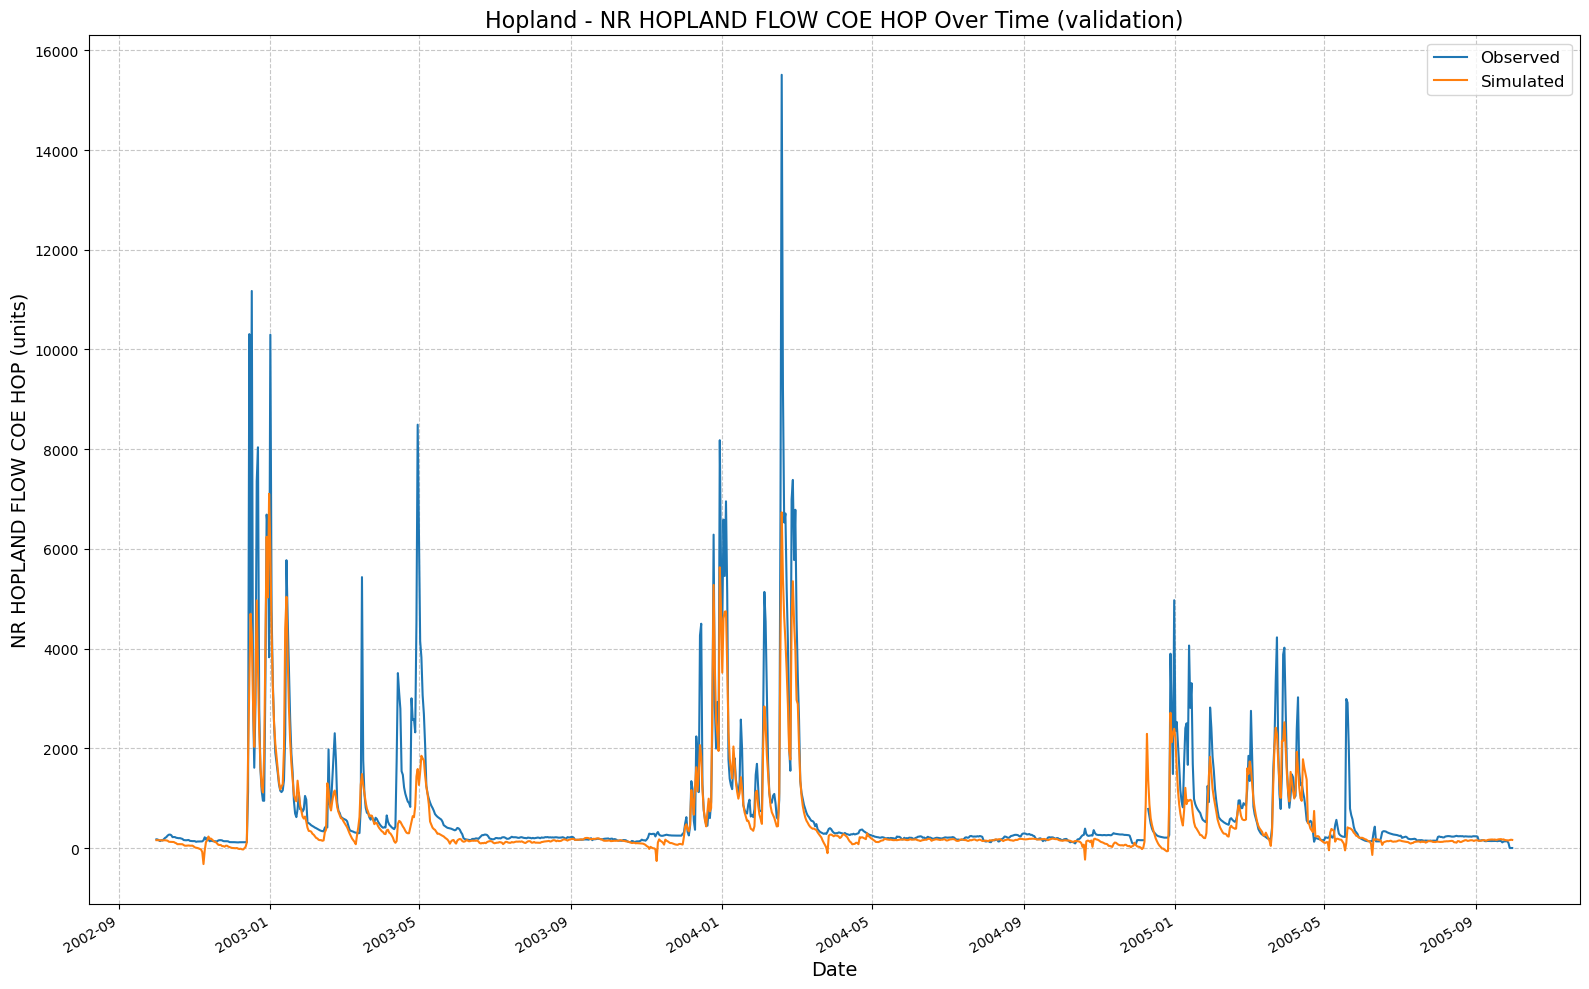

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201010/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:11:34,611: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201134/output.log initialized.
2025-02-16 20:11:34,611: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201134
2025-02-16 20:11:34,611: ### Run configurations for testing_run
2025-02-16 20:11:34,612: experiment_name: testing_run
2025-02-16 20:11:34,612: train_basin_file: hopland
2025-02-16 20:11:34,613: validation_basin_file: hopland
2025-02-16 20:11:34,613: test_basin_file: hopland
2025-02-16 20:11:34,613: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:11:34,614: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.57it/s]
2025-02-16 20:11:34,764: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1239.45it/s]
2025-02-16 20:11:34,769: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:05<00:00,  2.15it/s, Loss: 0.0000]
2025-02-16 20:11:40,045: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s, Loss: 0.0000]
2025-02-16 20:11:44,924: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.27it/s, Loss: 0.0000]
2025-02-16 20:11:49,778: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.33it/s, Loss: 0.0000]
2025-02-16 20:11:54,511: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.35it/s, Loss: 0.0000]
2025-02-16 20:11:59,201: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
2025-02-16 20:14:16,094: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201134/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:14:16,096: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201134/validation/model_epoch032/validation_results.p
got predictions


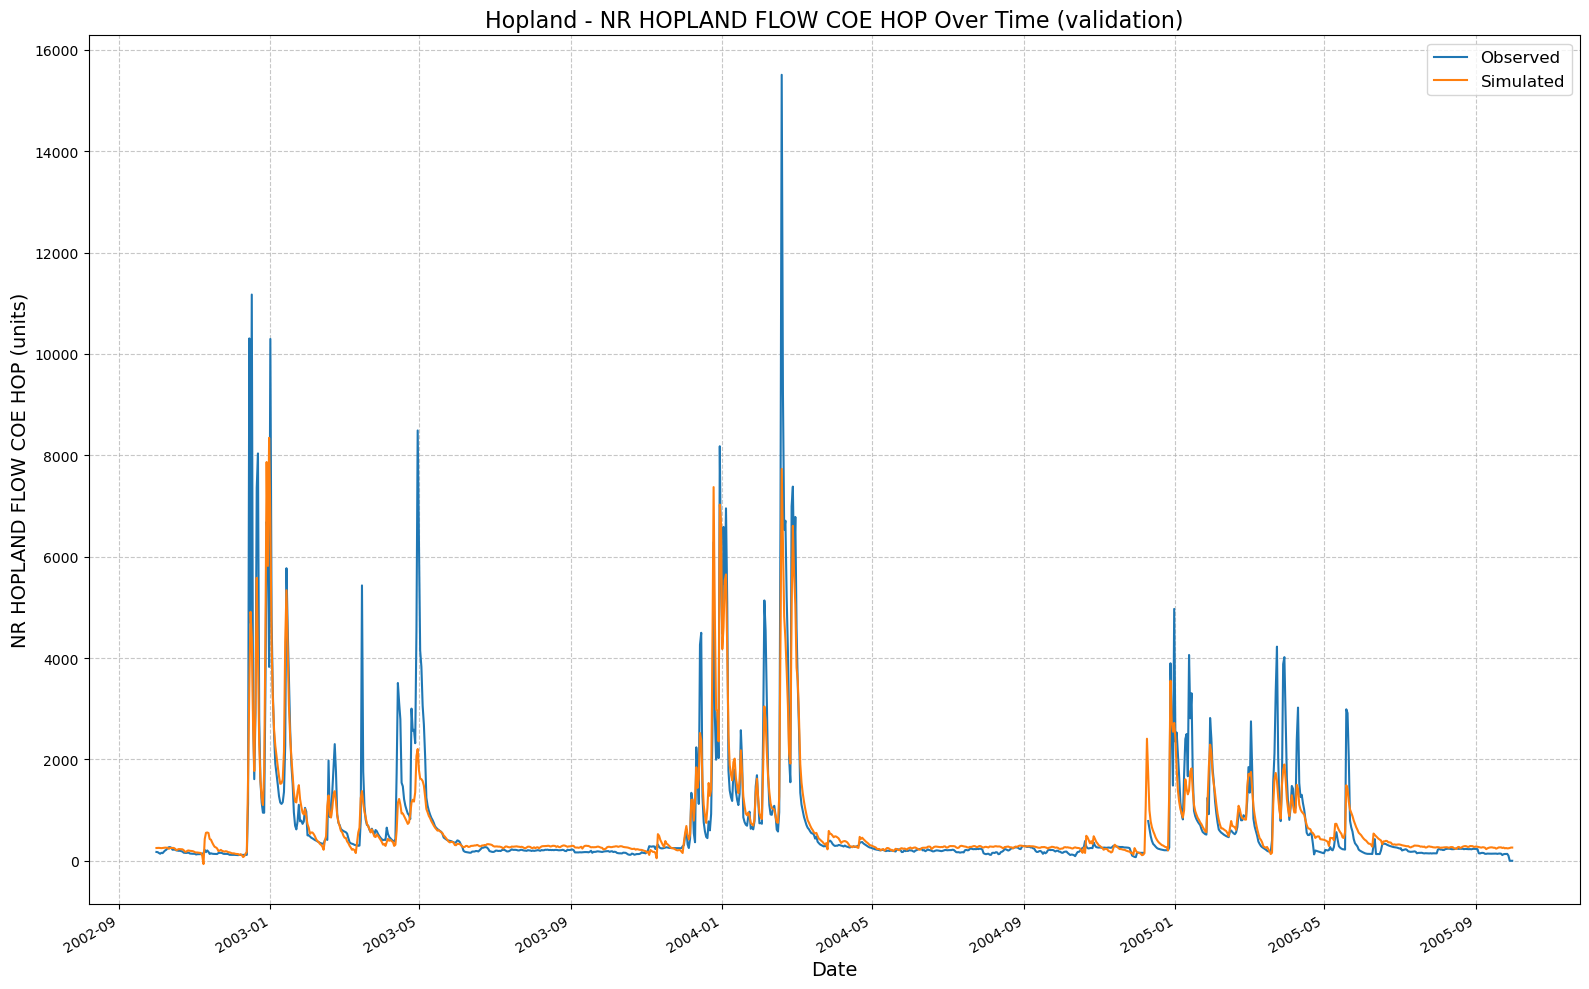

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201134/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [9]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"NoPhysics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=False,
            extend_train_period=False,
            gpu=-1
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        no_physics_results.append(row_data)
    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping Grid-Search")

Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:14:16,548: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201416/output.log initialized.
2025-02-16 20:14:16,549: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201416
2025-02-16 20:14:16,549: ### Run configurations for testing_run
2025-02-16 20:14:16,550: experiment_name: testing_run
2025-02-16 20:14:16,550: train_basin_file: hopland
2025-02-16 20:14:16,551: validation_basin_file: hopland
2025-02-16 20:14:16,552: test_basin_file: hopland
2025-02-16 20:14:16,553: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:14:16,553: train_end_date: 2002-09-30 00:00:00
2025-02-16 20:14:16,554: validation_start_date: 2002-10-01 00:00:00
2025-02-16 20:14:16,554: validation_end_date: 2005-09-30 00:00:00
2025-02-16 20:14:16,55

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]
2025-02-16 20:14:38,855: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201416/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:14:38,856: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201416/validation/model_epoch016/validation_results.p
got predictions


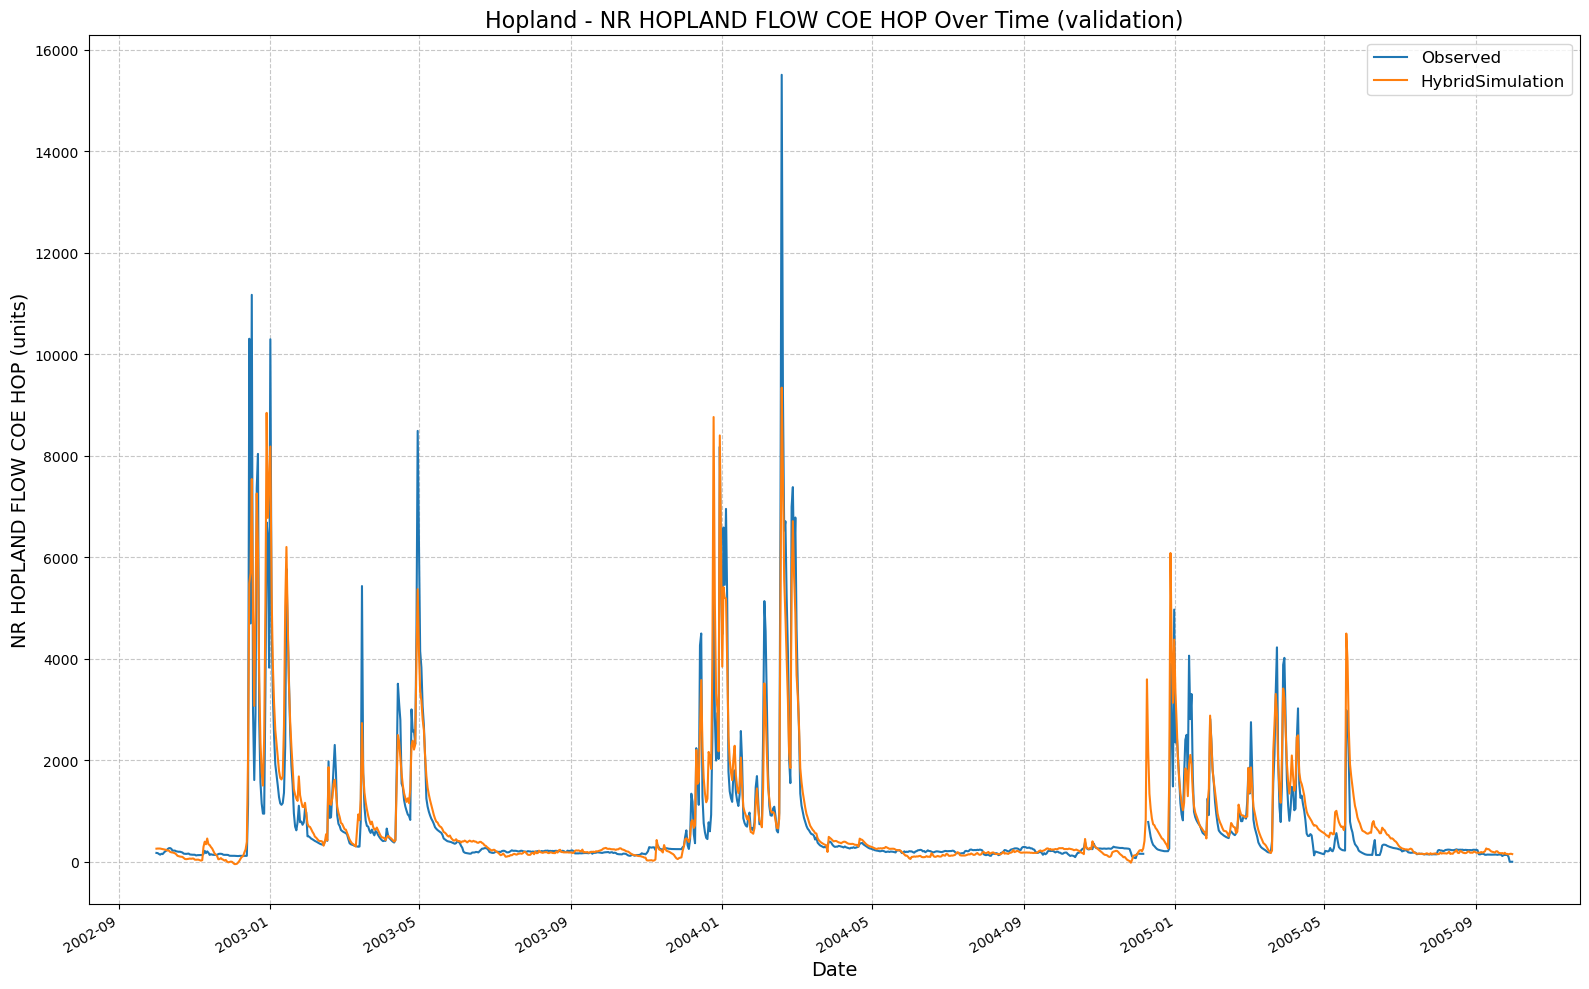

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201416/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:14:39,095: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201439/output.log initialized.
2025-02-16 20:14:39,096: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201439
2025-02-16 20:14:39,096: ### Run configurations for testing_run
2025-02-16 20:14:39,096: experiment_name: testing_run
2025-02-16 20:14:39,097: train_basin_file: hopland
2025-02-16 20:14:39,097: validation_basin_file: hopland
2025-02-16 20:14:39,097: test_basin_file: hopland
2025-02-16 20:14:39,098: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:14:39,098: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.40it/s]
2025-02-16 20:14:39,306: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1038.45it/s]
2025-02-16 20:14:39,314: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  8.23it/s, Loss: 0.0000]
2025-02-16 20:14:40,866: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  8.86it/s, Loss: 0.0000]
2025-02-16 20:14:42,110: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  8.82it/s, Loss: 0.0000]
2025-02-16 20:14:43,360: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  8.37it/s, Loss: 0.0000]
2025-02-16 20:14:44,678: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  8.59it/s, Loss: 0.0000]
2025-02-16 20:14:45,960: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]
2025-02-16 20:15:23,296: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201439/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:15:23,297: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201439/validation/model_epoch032/validation_results.p
got predictions


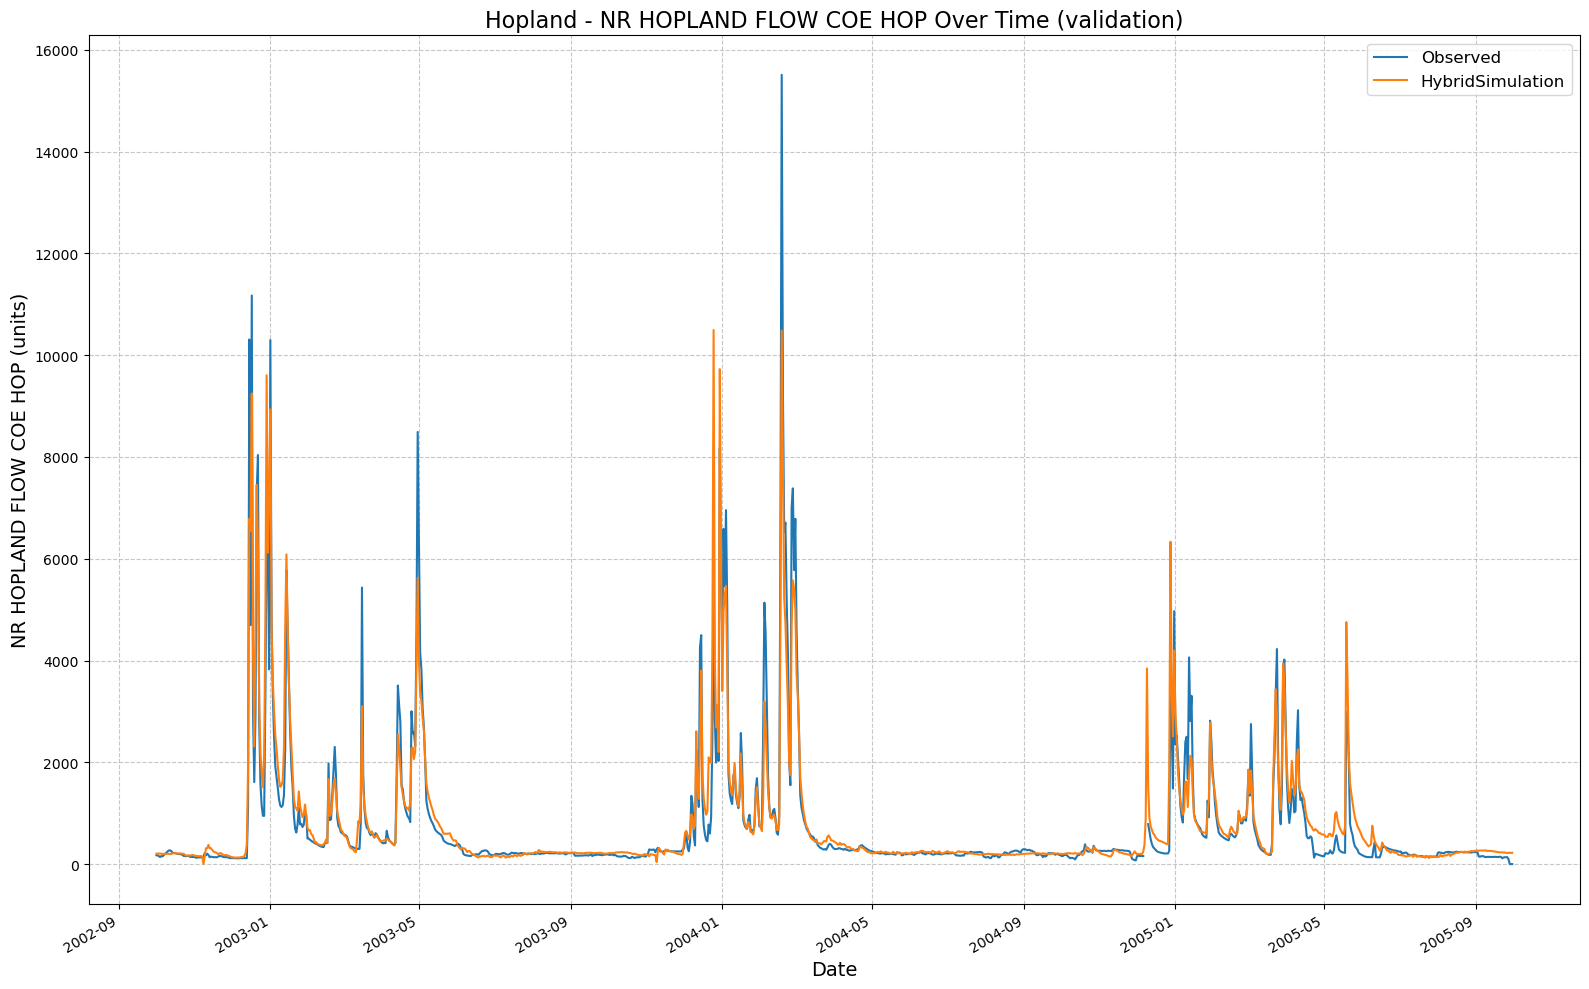

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201439/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:15:23,540: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201523/output.log initialized.
2025-02-16 20:15:23,540: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201523
2025-02-16 20:15:23,540: ### Run configurations for testing_run
2025-02-16 20:15:23,541: experiment_name: testing_run
2025-02-16 20:15:23,541: train_basin_file: hopland
2025-02-16 20:15:23,541: validation_basin_file: hopland
2025-02-16 20:15:23,542: test_basin_file: hopland
2025-02-16 20:15:23,542: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:15:23,543: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.37it/s]
2025-02-16 20:15:23,752: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 981.12it/s]
2025-02-16 20:15:23,760: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  9.54it/s, Loss: 0.0000]
2025-02-16 20:15:25,171: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  9.52it/s, Loss: 0.0000]
2025-02-16 20:15:26,329: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  9.12it/s, Loss: 0.0000]
2025-02-16 20:15:27,538: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  8.99it/s, Loss: 0.0000]
2025-02-16 20:15:28,764: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  9.14it/s, Loss: 0.0000]
2025-02-16 20:15:29,970: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]
2025-02-16 20:15:45,890: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201523/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:15:45,891: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201523/validation/model_epoch016/validation_results.p
got predictions


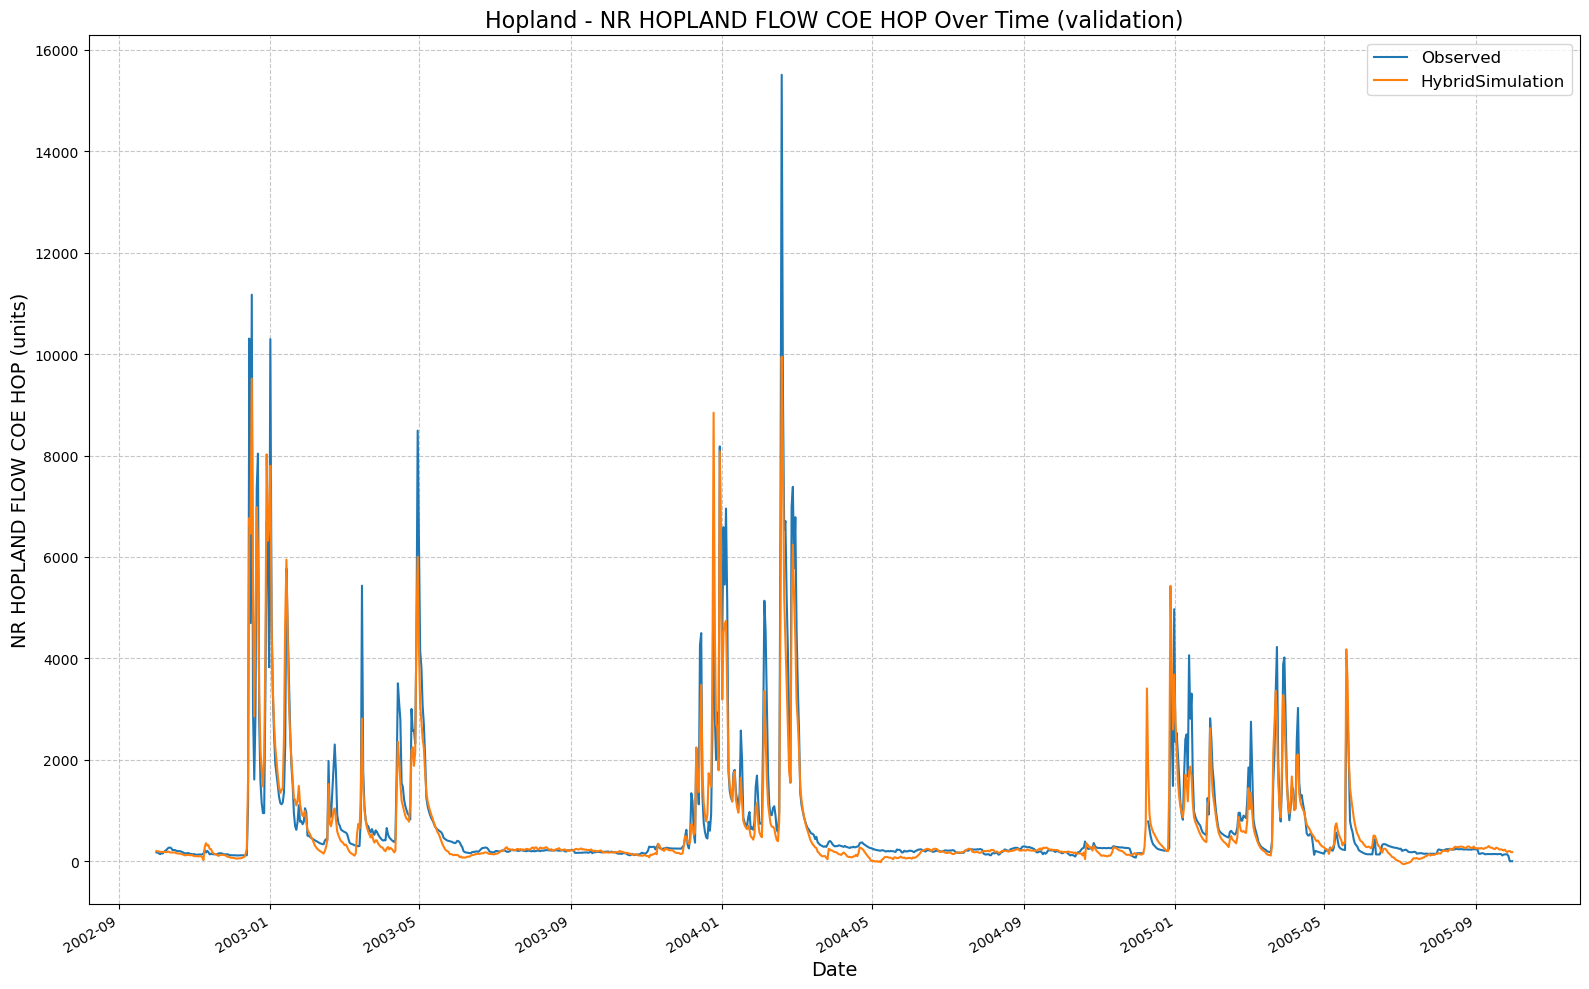

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201523/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:15:46,126: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201546/output.log initialized.
2025-02-16 20:15:46,127: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201546
2025-02-16 20:15:46,127: ### Run configurations for testing_run
2025-02-16 20:15:46,128: experiment_name: testing_run
2025-02-16 20:15:46,128: train_basin_file: hopland
2025-02-16 20:15:46,129: validation_basin_file: hopland
2025-02-16 20:15:46,129: test_basin_file: hopland
2025-02-16 20:15:46,129: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:15:46,130: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.70it/s]
2025-02-16 20:15:46,322: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1107.55it/s]
2025-02-16 20:15:46,329: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  8.33it/s, Loss: 0.0000]
2025-02-16 20:15:47,812: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  8.57it/s, Loss: 0.0000]
2025-02-16 20:15:49,099: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  8.26it/s, Loss: 0.0000]
2025-02-16 20:15:50,434: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s, Loss: 0.0000]
2025-02-16 20:15:51,787: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  8.29it/s, Loss: 0.0000]
2025-02-16 20:15:53,118: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]
2025-02-16 20:16:31,943: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201546/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:16:31,944: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201546/validation/model_epoch032/validation_results.p
got predictions


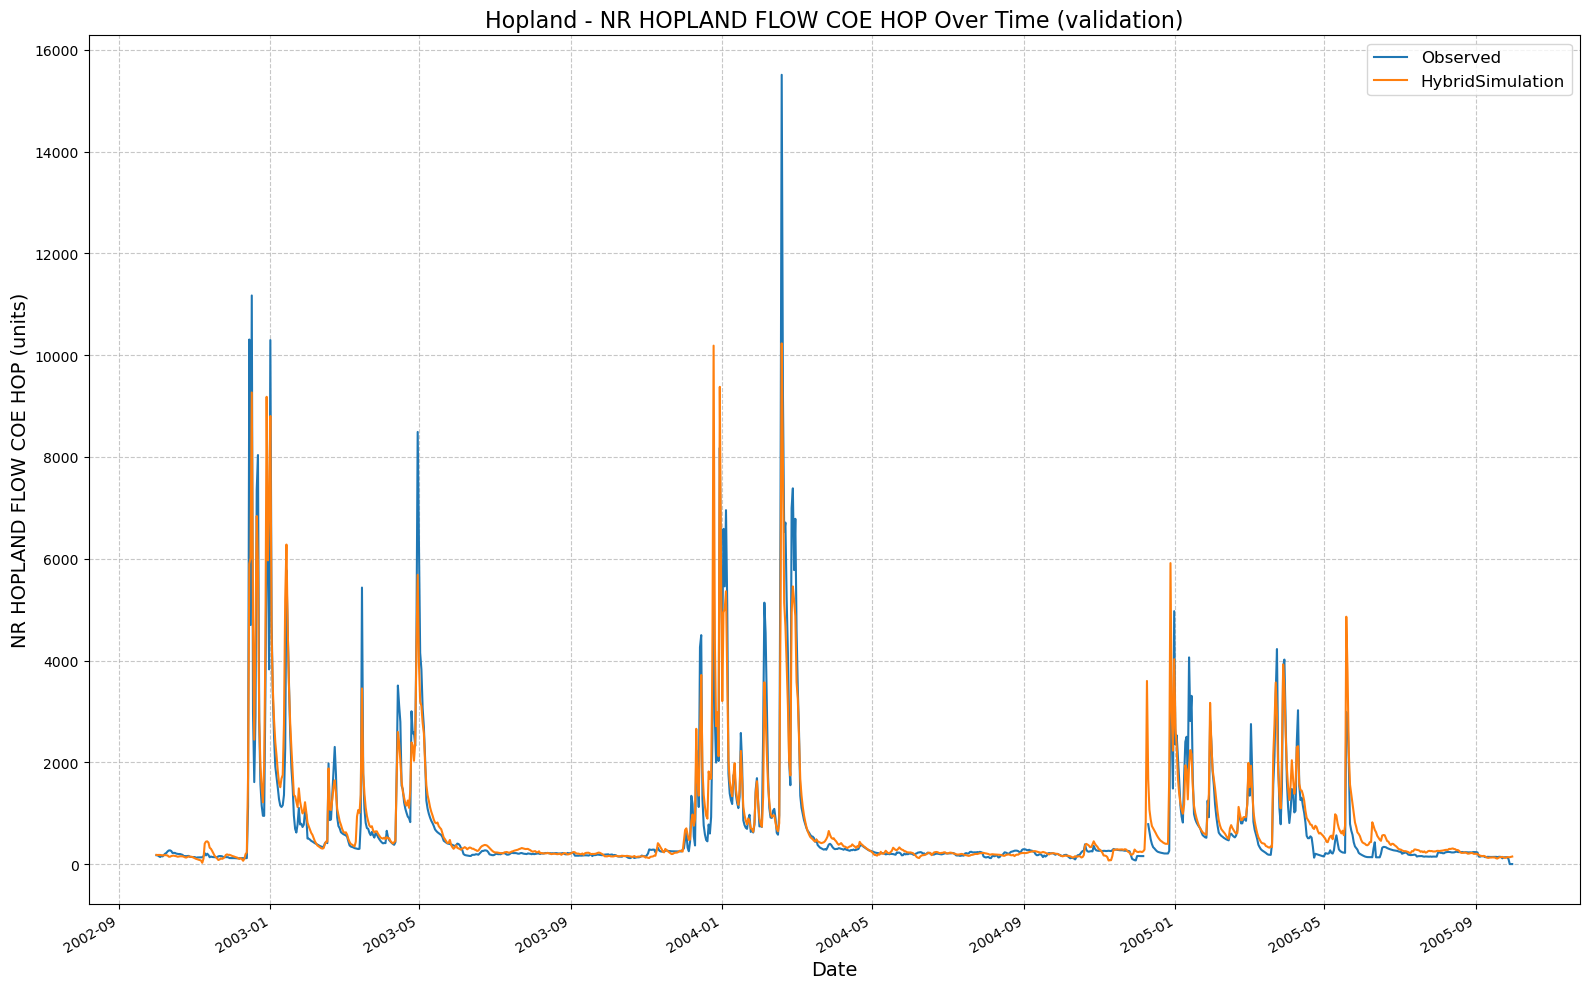

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201546/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:16:32,182: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201632/output.log initialized.
2025-02-16 20:16:32,182: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201632
2025-02-16 20:16:32,183: ### Run configurations for testing_run
2025-02-16 20:16:32,183: experiment_name: testing_run
2025-02-16 20:16:32,183: train_basin_file: hopland
2025-02-16 20:16:32,184: validation_basin_file: hopland
2025-02-16 20:16:32,184: test_basin_file: hopland
2025-02-16 20:16:32,185: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:16:32,185: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.02it/s]
2025-02-16 20:16:32,371: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1274.09it/s]
2025-02-16 20:16:32,378: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s, Loss: 0.0000]
2025-02-16 20:16:35,119: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.41it/s, Loss: 0.0000]
2025-02-16 20:16:37,618: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.16it/s, Loss: 0.0000]
2025-02-16 20:16:40,268: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s, Loss: 0.0000]
2025-02-16 20:16:42,821: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s, Loss: 0.0000]
2025-02-16 20:16:45,360: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]
2025-02-16 20:17:15,918: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201632/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:17:15,919: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201632/validation/model_epoch016/validation_results.p
got predictions


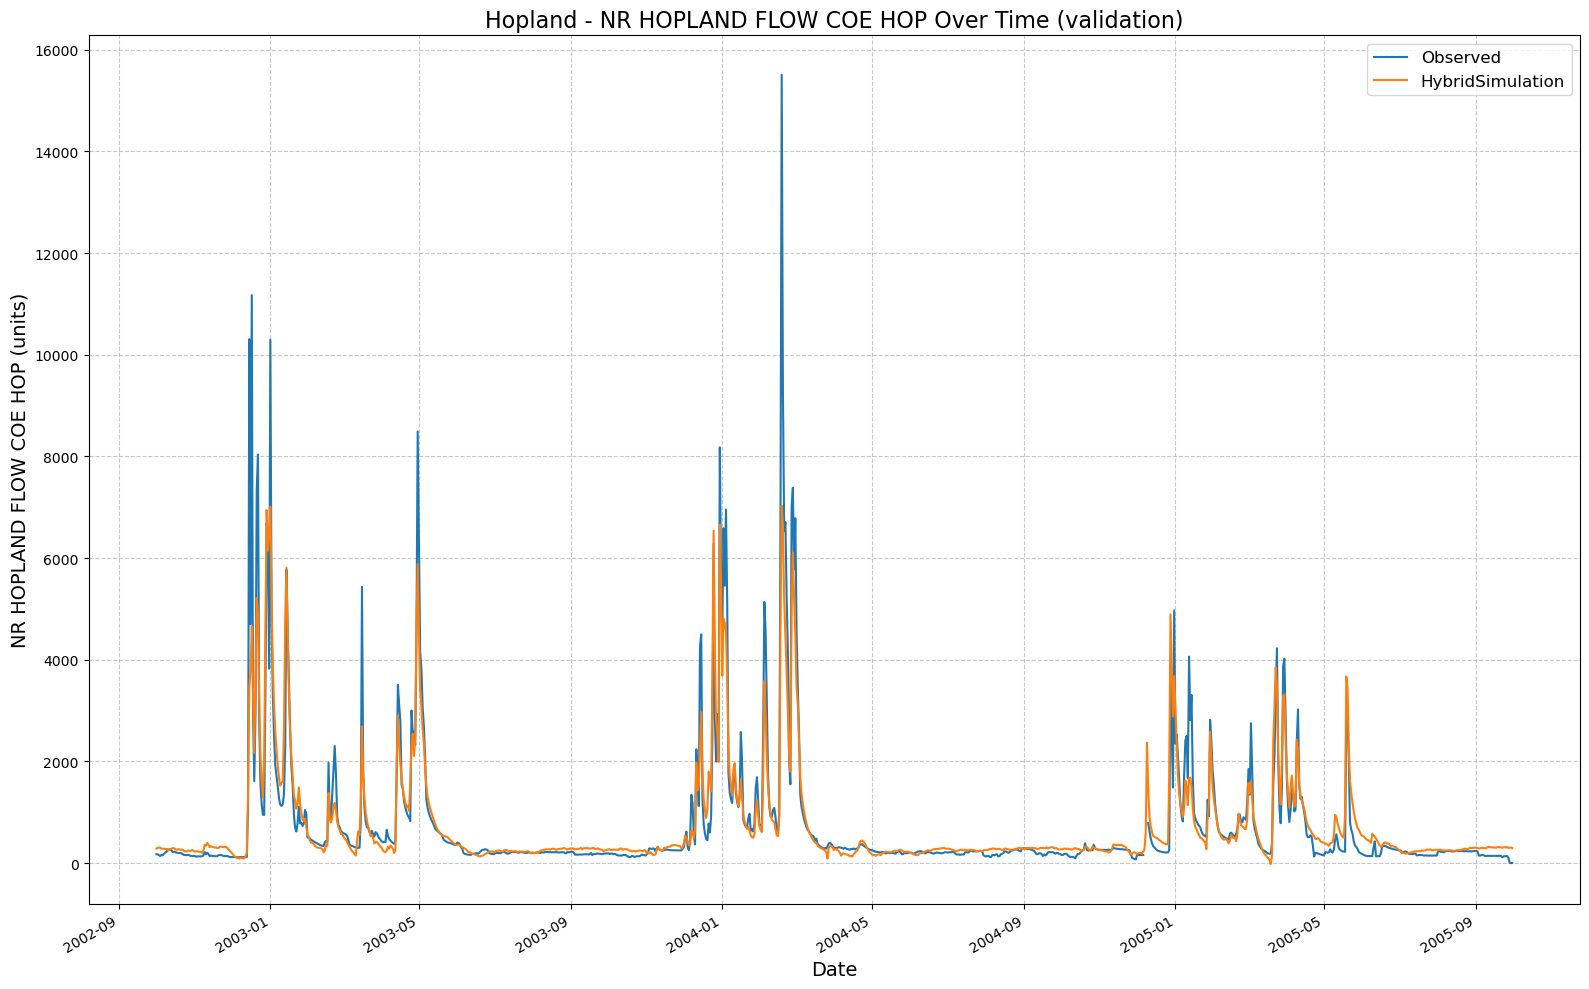

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201632/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:17:16,154: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201716/output.log initialized.
2025-02-16 20:17:16,154: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201716
2025-02-16 20:17:16,155: ### Run configurations for testing_run
2025-02-16 20:17:16,155: experiment_name: testing_run
2025-02-16 20:17:16,156: train_basin_file: hopland
2025-02-16 20:17:16,156: validation_basin_file: hopland
2025-02-16 20:17:16,156: test_basin_file: hopland
2025-02-16 20:17:16,157: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:17:16,157: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
2025-02-16 20:17:16,350: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1055.97it/s]
2025-02-16 20:17:16,358: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.10it/s, Loss: 0.0000]
2025-02-16 20:17:19,225: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s, Loss: 0.0000]
2025-02-16 20:17:21,714: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.60it/s, Loss: 0.0000]
2025-02-16 20:17:24,107: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.74it/s, Loss: 0.0000]
2025-02-16 20:17:26,431: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.62it/s, Loss: 0.0000]
2025-02-16 20:17:28,813: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
2025-02-16 20:18:41,671: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201716/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:18:41,672: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201716/validation/model_epoch032/validation_results.p
got predictions


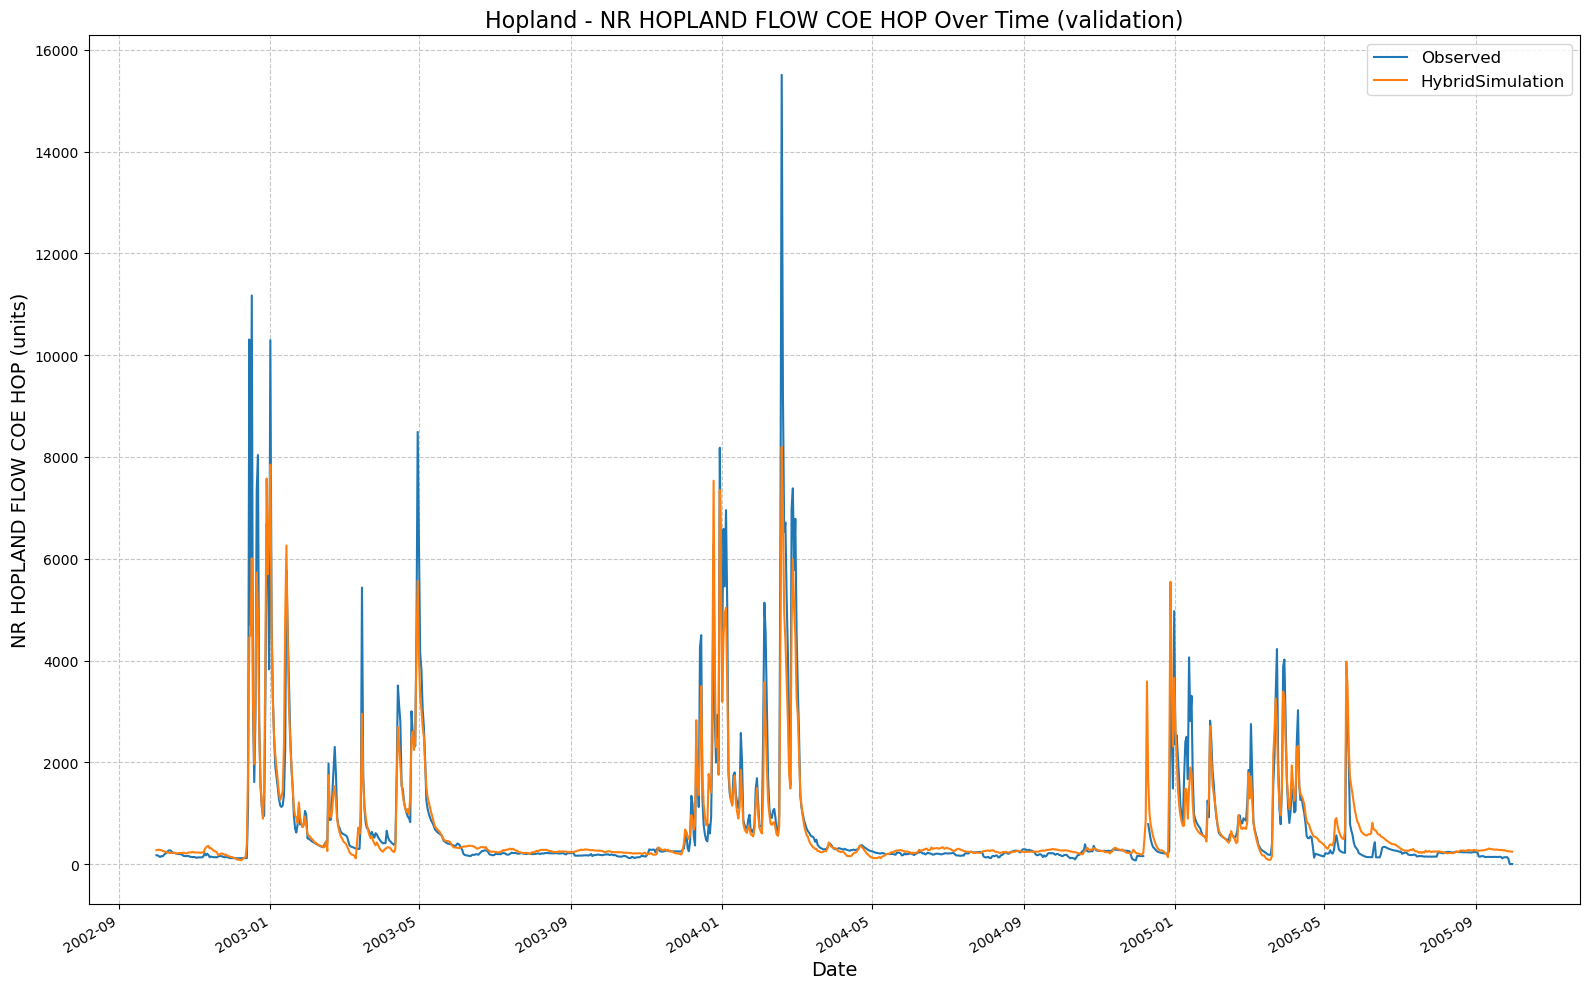

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201716/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:18:41,909: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201841/output.log initialized.
2025-02-16 20:18:41,910: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201841
2025-02-16 20:18:41,910: ### Run configurations for testing_run
2025-02-16 20:18:41,910: experiment_name: testing_run
2025-02-16 20:18:41,911: train_basin_file: hopland
2025-02-16 20:18:41,911: validation_basin_file: hopland
2025-02-16 20:18:41,911: test_basin_file: hopland
2025-02-16 20:18:41,912: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:18:41,912: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.62it/s]
2025-02-16 20:18:42,109: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1046.22it/s]
2025-02-16 20:18:42,121: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.17it/s, Loss: 0.0000]
2025-02-16 20:18:44,997: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.42it/s, Loss: 0.0000]
2025-02-16 20:18:47,488: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s, Loss: 0.0000]
2025-02-16 20:18:50,008: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s, Loss: 0.0000]
2025-02-16 20:18:52,525: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.14it/s, Loss: 0.0000]
2025-02-16 20:18:55,182: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]
2025-02-16 20:19:26,097: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201841/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:19:26,097: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201841/validation/model_epoch016/validation_results.p
got predictions


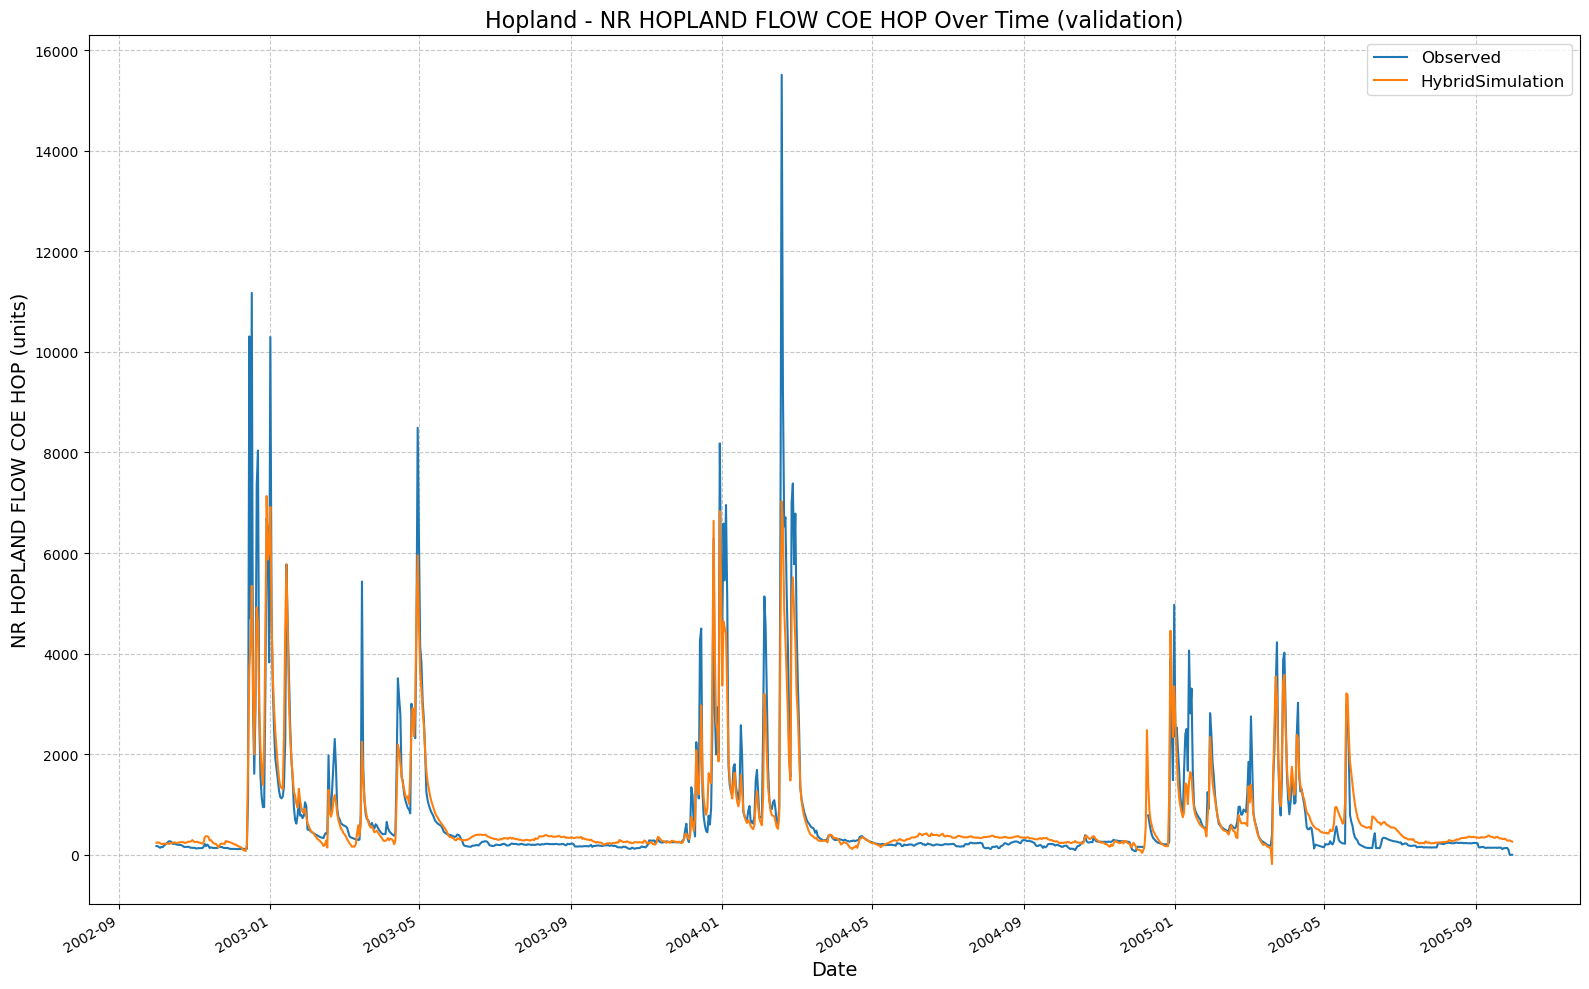

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201841/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:19:26,337: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201926/output.log initialized.
2025-02-16 20:19:26,337: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201926
2025-02-16 20:19:26,338: ### Run configurations for testing_run
2025-02-16 20:19:26,338: experiment_name: testing_run
2025-02-16 20:19:26,339: train_basin_file: hopland
2025-02-16 20:19:26,339: validation_basin_file: hopland
2025-02-16 20:19:26,339: test_basin_file: hopland
2025-02-16 20:19:26,340: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:19:26,340: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-02-16 20:19:26,564: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 957.82it/s]
2025-02-16 20:19:26,571: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.27it/s, Loss: 0.0000]
2025-02-16 20:19:29,327: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.70it/s, Loss: 0.0000]
2025-02-16 20:19:31,672: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s, Loss: 0.0000]
2025-02-16 20:19:34,208: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.27it/s, Loss: 0.0000]
2025-02-16 20:19:36,789: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.51it/s, Loss: 0.0000]
2025-02-16 20:19:39,229: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
2025-02-16 20:20:50,947: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201926/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:20:50,948: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201926/validation/model_epoch032/validation_results.p
got predictions


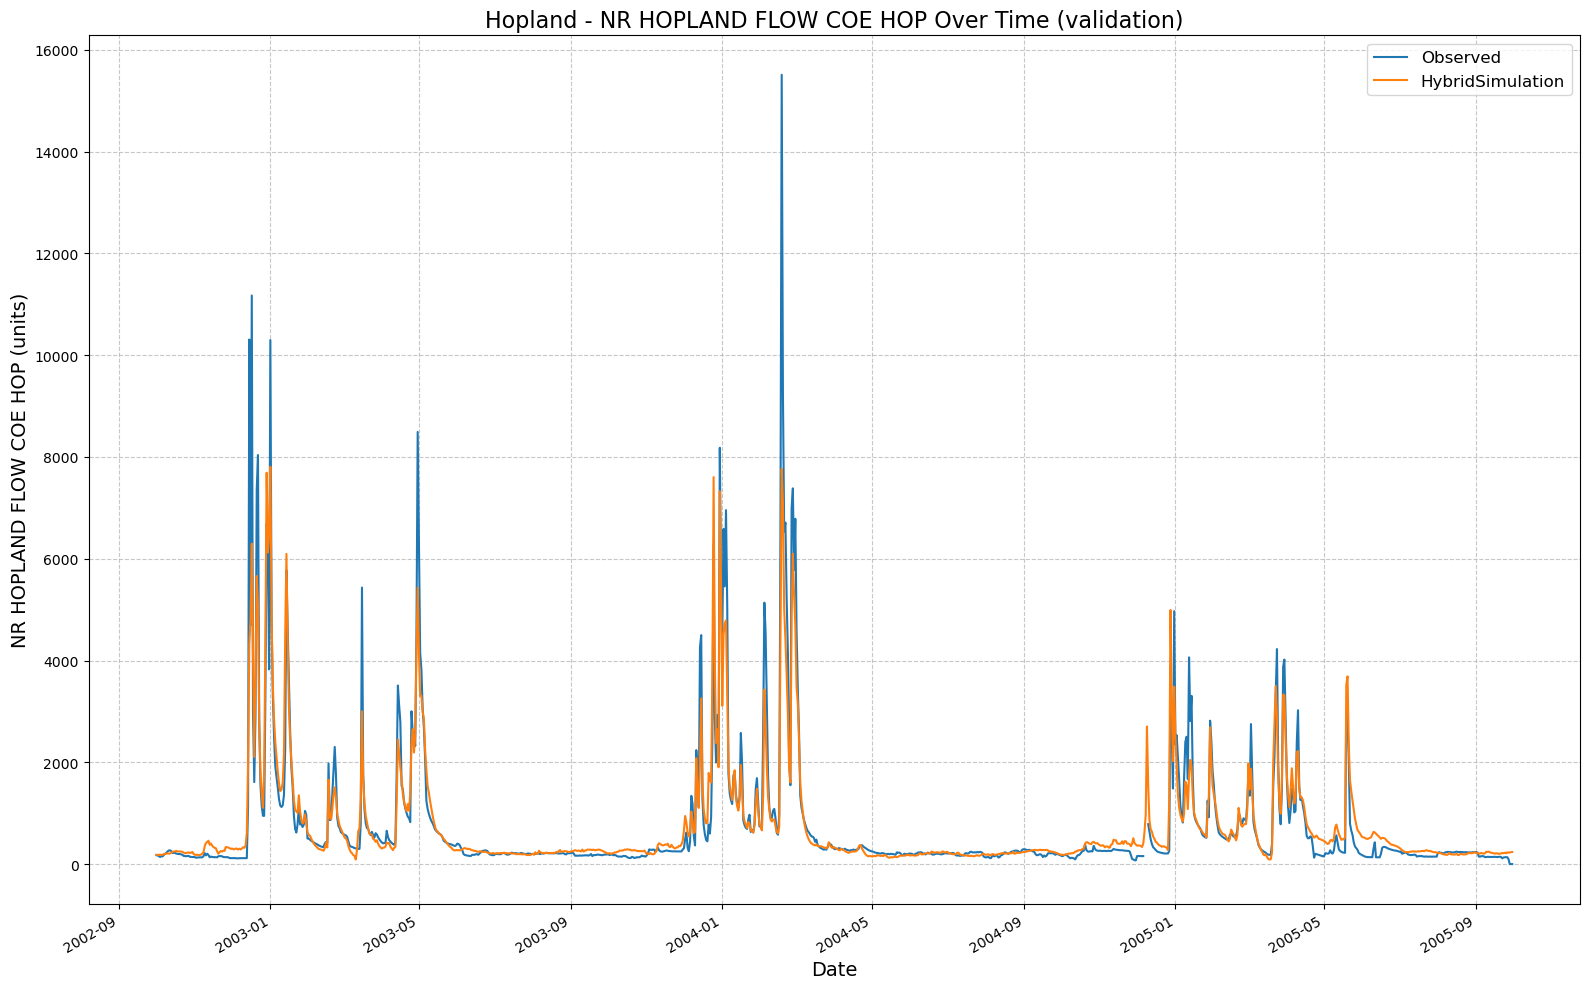

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_201926/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:20:51,185: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202051/output.log initialized.
2025-02-16 20:20:51,185: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202051
2025-02-16 20:20:51,186: ### Run configurations for testing_run
2025-02-16 20:20:51,186: experiment_name: testing_run
2025-02-16 20:20:51,186: train_basin_file: hopland
2025-02-16 20:20:51,187: validation_basin_file: hopland
2025-02-16 20:20:51,187: test_basin_file: hopland
2025-02-16 20:20:51,188: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:20:51,188: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
2025-02-16 20:20:51,369: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1083.52it/s]
2025-02-16 20:20:51,376: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.65it/s, Loss: 0.0000]
2025-02-16 20:20:53,883: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s, Loss: 0.0000]
2025-02-16 20:20:56,439: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.53it/s, Loss: 0.0000]
2025-02-16 20:20:58,872: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.62it/s, Loss: 0.0000]
2025-02-16 20:21:01,253: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.25it/s, Loss: 0.0000]
2025-02-16 20:21:03,845: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]
2025-02-16 20:21:33,518: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202051/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:21:33,519: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202051/validation/model_epoch016/validation_results.p
got predictions


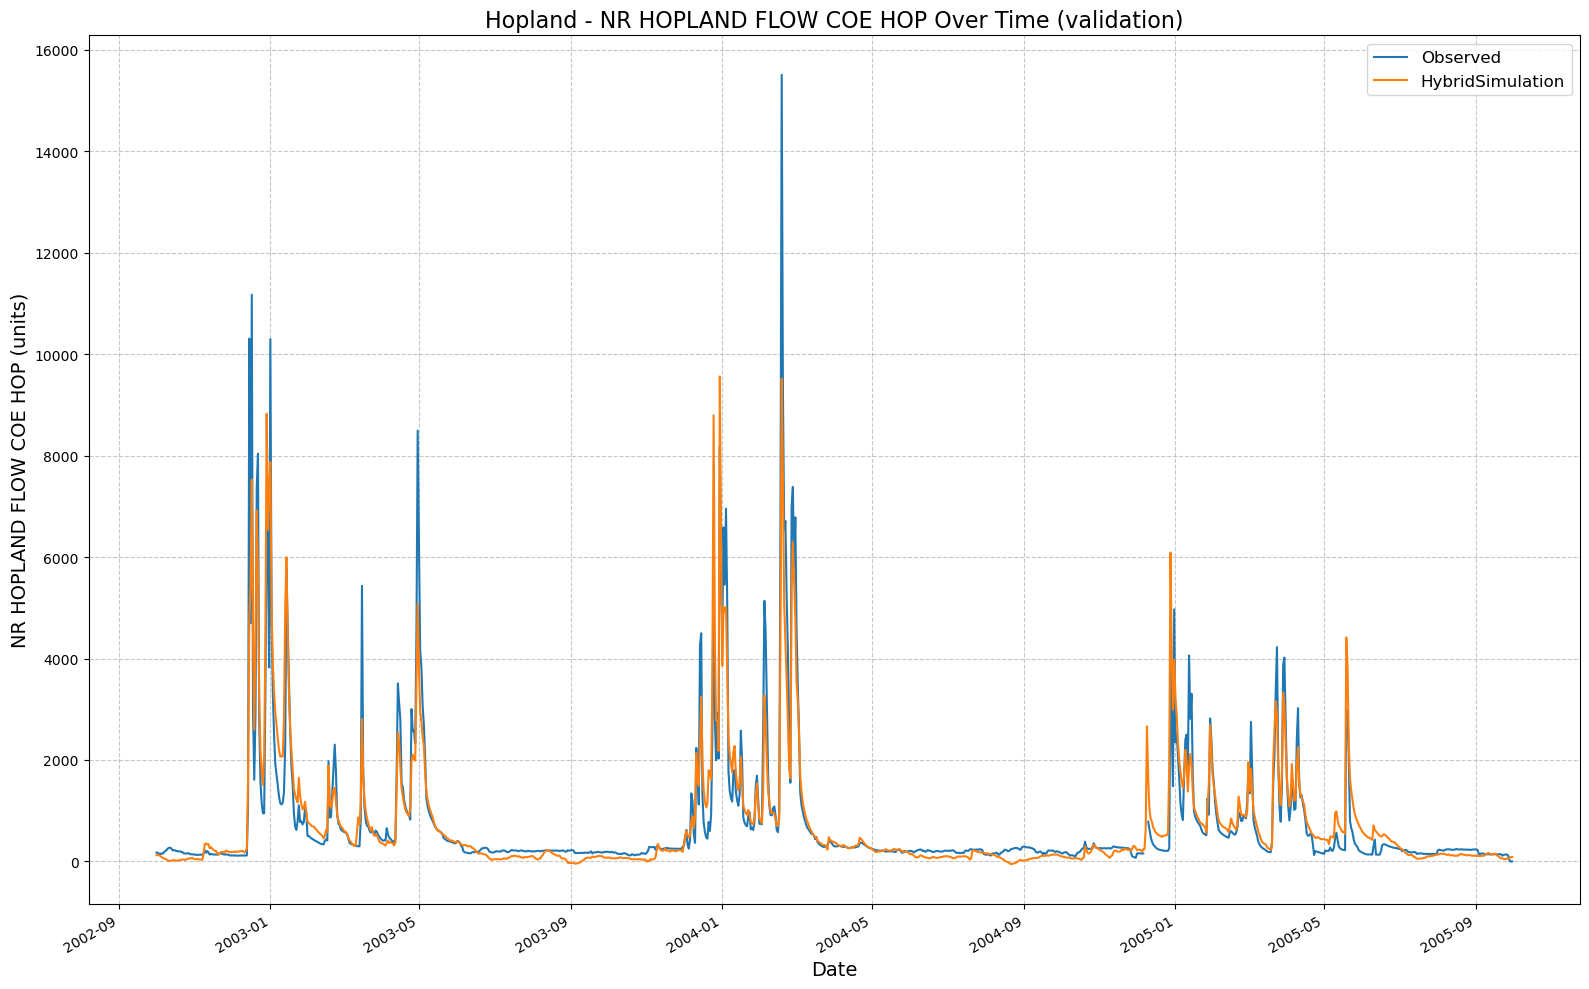

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202051/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:21:33,751: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202133/output.log initialized.
2025-02-16 20:21:33,752: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202133
2025-02-16 20:21:33,752: ### Run configurations for testing_run
2025-02-16 20:21:33,752: experiment_name: testing_run
2025-02-16 20:21:33,753: train_basin_file: hopland
2025-02-16 20:21:33,753: validation_basin_file: hopland
2025-02-16 20:21:33,753: test_basin_file: hopland
2025-02-16 20:21:33,754: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:21:33,754: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
2025-02-16 20:21:33,941: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1240.55it/s]
2025-02-16 20:21:33,948: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s, Loss: 0.0000]
2025-02-16 20:21:36,675: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.67it/s, Loss: 0.0000]
2025-02-16 20:21:39,036: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.13it/s, Loss: 0.0000]
2025-02-16 20:21:41,705: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.41it/s, Loss: 0.0000]
2025-02-16 20:21:44,204: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s, Loss: 0.0000]
2025-02-16 20:21:46,694: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
2025-02-16 20:22:58,193: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202133/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:22:58,194: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202133/validation/model_epoch032/validation_results.p
got predictions


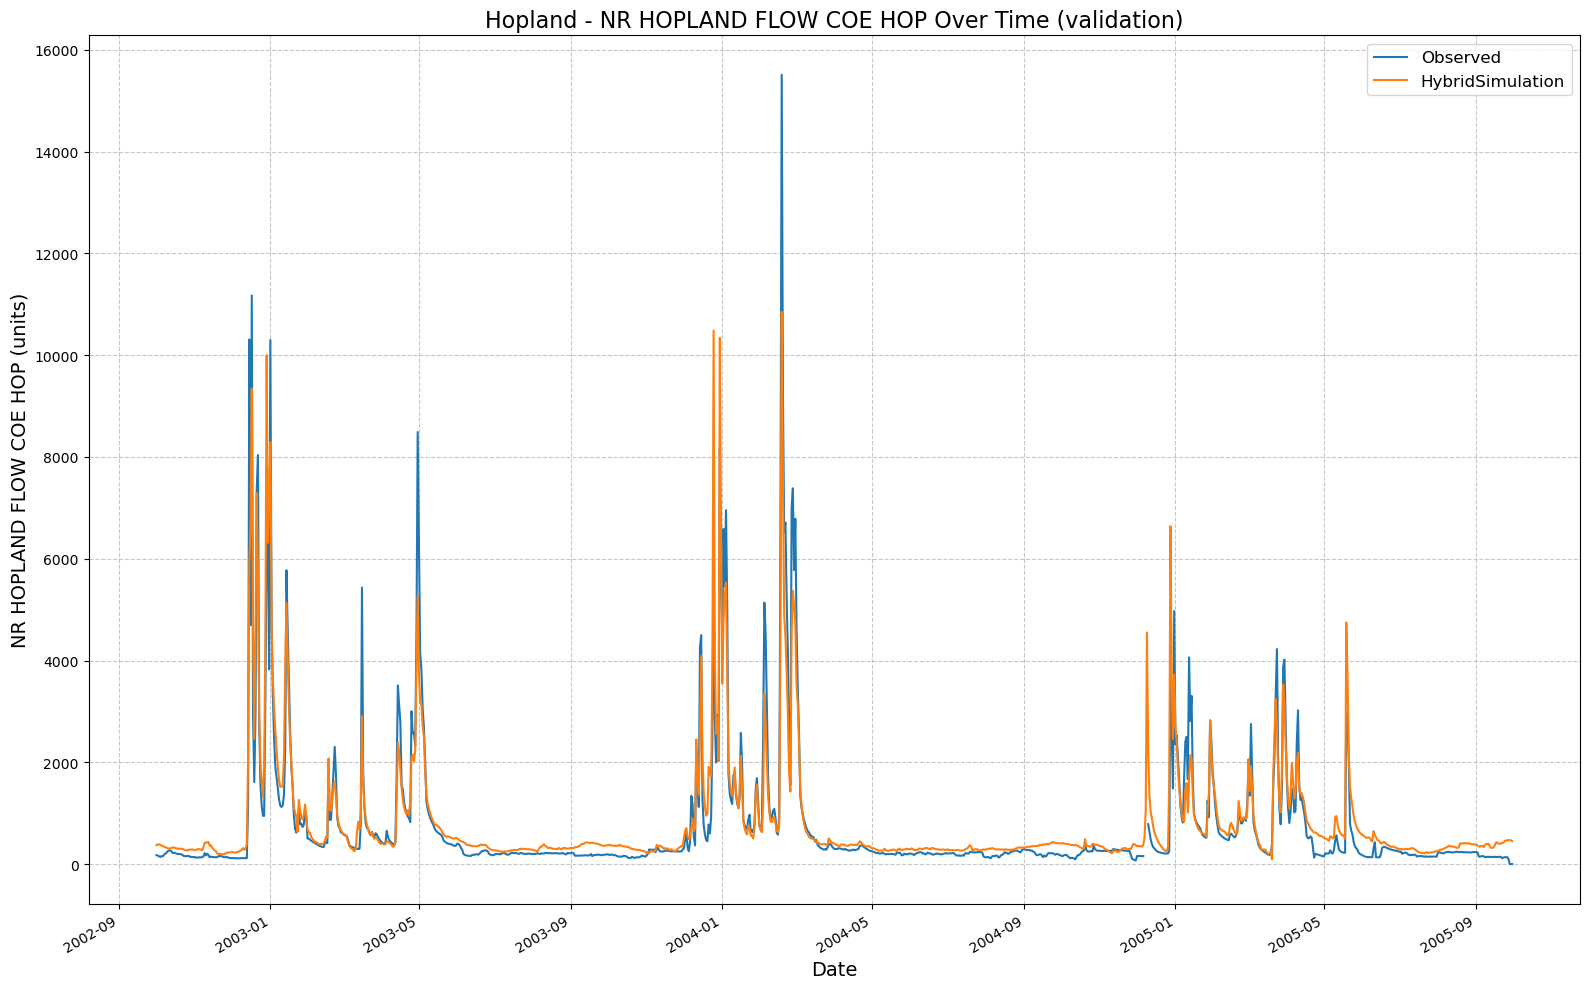

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202133/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:22:58,428: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202258/output.log initialized.
2025-02-16 20:22:58,428: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202258
2025-02-16 20:22:58,429: ### Run configurations for testing_run
2025-02-16 20:22:58,429: experiment_name: testing_run
2025-02-16 20:22:58,429: train_basin_file: hopland
2025-02-16 20:22:58,430: validation_basin_file: hopland
2025-02-16 20:22:58,430: test_basin_file: hopland
2025-02-16 20:22:58,430: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:22:58,431: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.18it/s]
2025-02-16 20:22:58,612: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1217.86it/s]
2025-02-16 20:22:58,619: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.42it/s, Loss: 0.0000]
2025-02-16 20:23:01,245: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.64it/s, Loss: 0.0000]
2025-02-16 20:23:03,621: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.35it/s, Loss: 0.0000]
2025-02-16 20:23:06,155: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.44it/s, Loss: 0.0000]
2025-02-16 20:23:08,637: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  3.99it/s, Loss: 0.0000]
2025-02-16 20:23:11,400: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]
2025-02-16 20:23:41,244: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202258/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:23:41,245: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202258/validation/model_epoch016/validation_results.p
got predictions


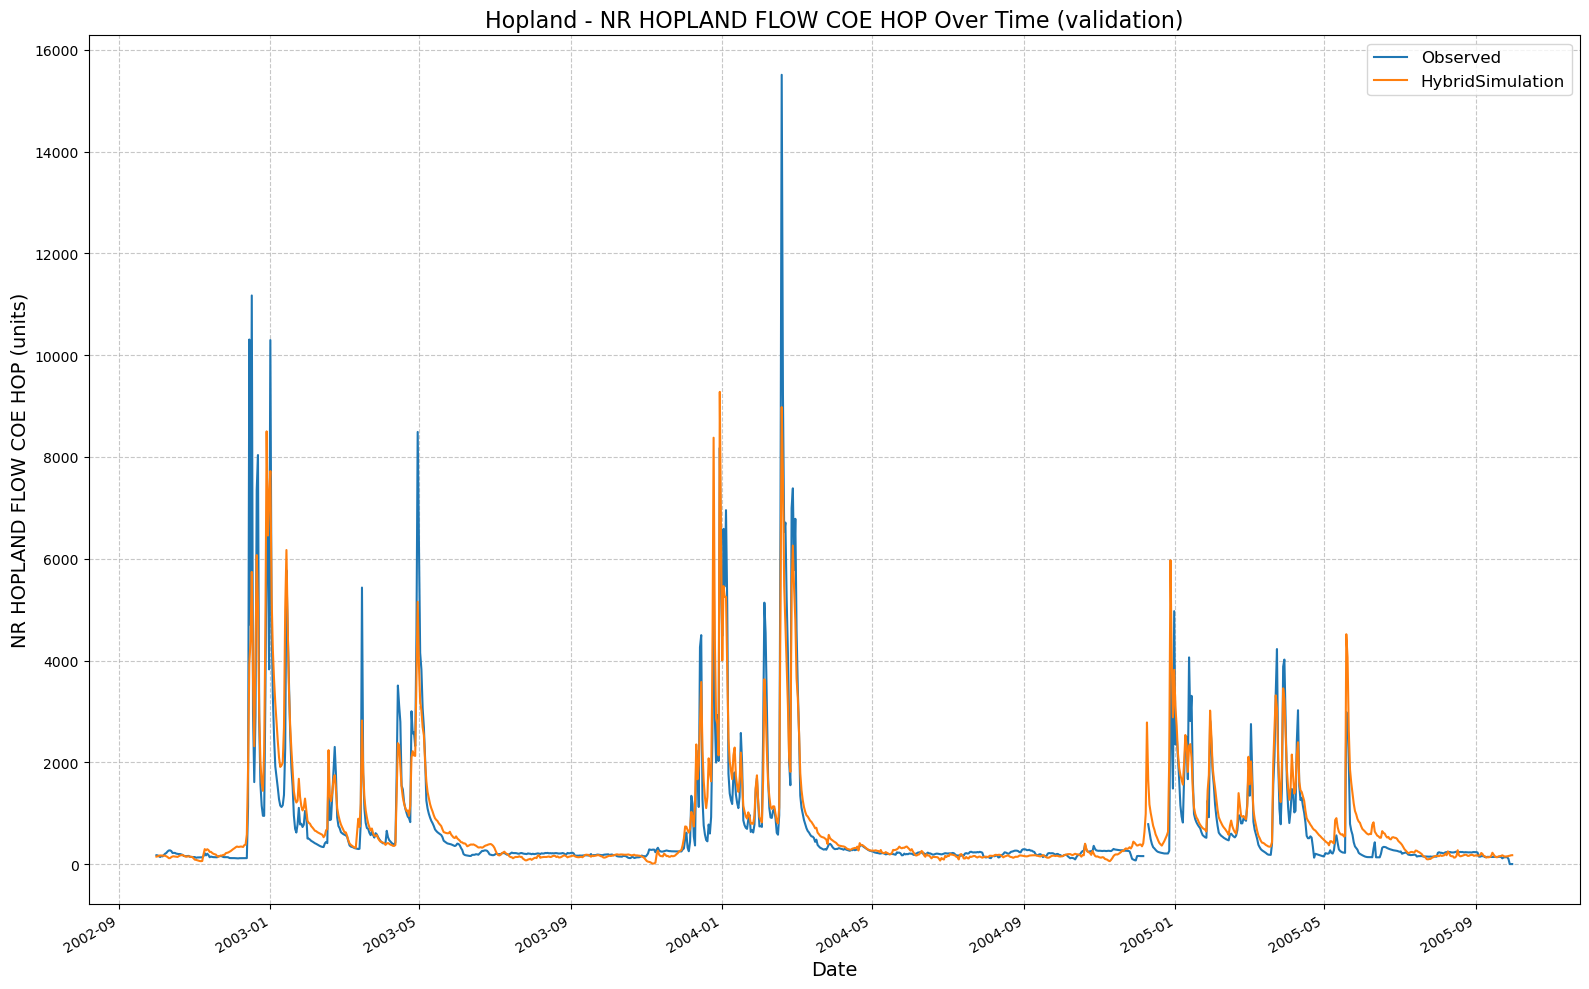

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202258/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:23:41,494: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202341/output.log initialized.
2025-02-16 20:23:41,494: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202341
2025-02-16 20:23:41,495: ### Run configurations for testing_run
2025-02-16 20:23:41,495: experiment_name: testing_run
2025-02-16 20:23:41,495: train_basin_file: hopland
2025-02-16 20:23:41,496: validation_basin_file: hopland
2025-02-16 20:23:41,496: test_basin_file: hopland
2025-02-16 20:23:41,496: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:23:41,496: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.10it/s]
2025-02-16 20:23:41,719: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1009.22it/s]
2025-02-16 20:23:41,727: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s, Loss: 0.0000]
2025-02-16 20:23:44,411: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.51it/s, Loss: 0.0000]
2025-02-16 20:23:46,853: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  4.53it/s, Loss: 0.0000]
2025-02-16 20:23:49,287: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  4.56it/s, Loss: 0.0000]
2025-02-16 20:23:51,700: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.33it/s, Loss: 0.0000]
2025-02-16 20:23:54,240: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]
2025-02-16 20:25:04,207: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202341/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:25:04,207: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202341/validation/model_epoch032/validation_results.p
got predictions


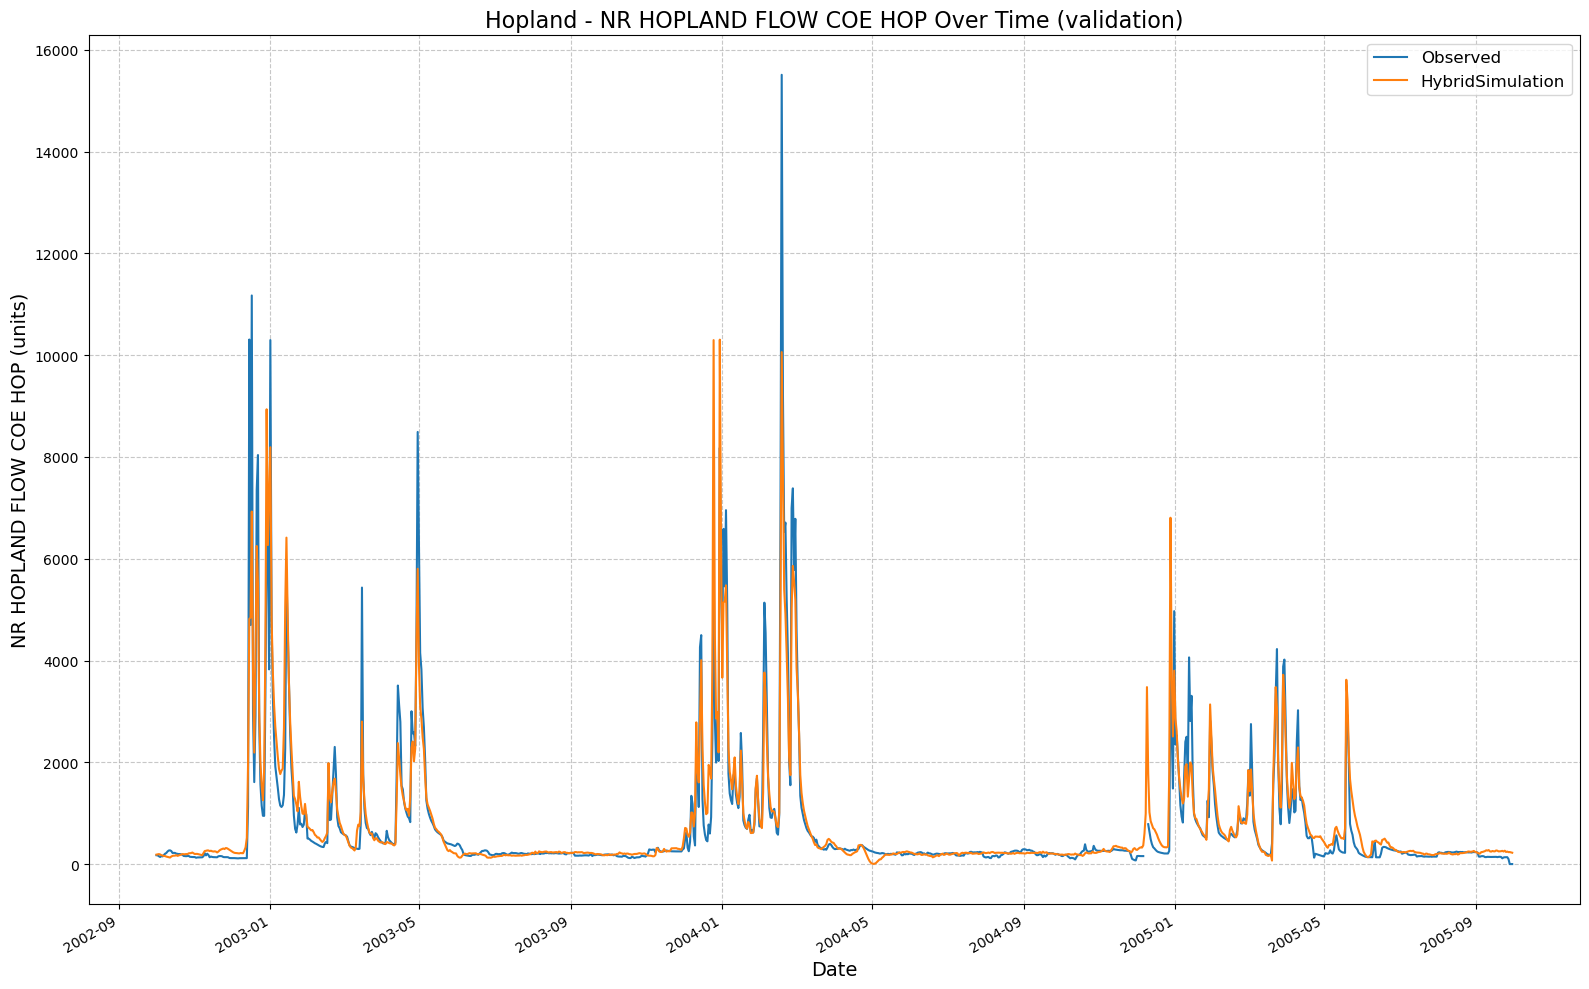

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202341/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:25:04,440: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202504/output.log initialized.
2025-02-16 20:25:04,441: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202504
2025-02-16 20:25:04,441: ### Run configurations for testing_run
2025-02-16 20:25:04,441: experiment_name: testing_run
2025-02-16 20:25:04,442: train_basin_file: hopland
2025-02-16 20:25:04,442: validation_basin_file: hopland
2025-02-16 20:25:04,443: test_basin_file: hopland
2025-02-16 20:25:04,443: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:25:04,444: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
2025-02-16 20:25:04,625: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1305.42it/s]
2025-02-16 20:25:04,631: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [01:25<00:00,  7.75s/it, Loss: 0.0000]
2025-02-16 20:26:30,074: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:05<00:00,  2.00it/s, Loss: 0.0000]
2025-02-16 20:26:35,565: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.48it/s, Loss: 0.0000]
2025-02-16 20:26:40,001: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.45it/s, Loss: 0.0000]
2025-02-16 20:26:44,491: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s, Loss: 0.0000]
2025-02-16 20:26:49,155: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]
2025-02-16 20:40:33,655: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202504/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:40:33,655: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202504/validation/model_epoch016/validation_results.p
got predictions


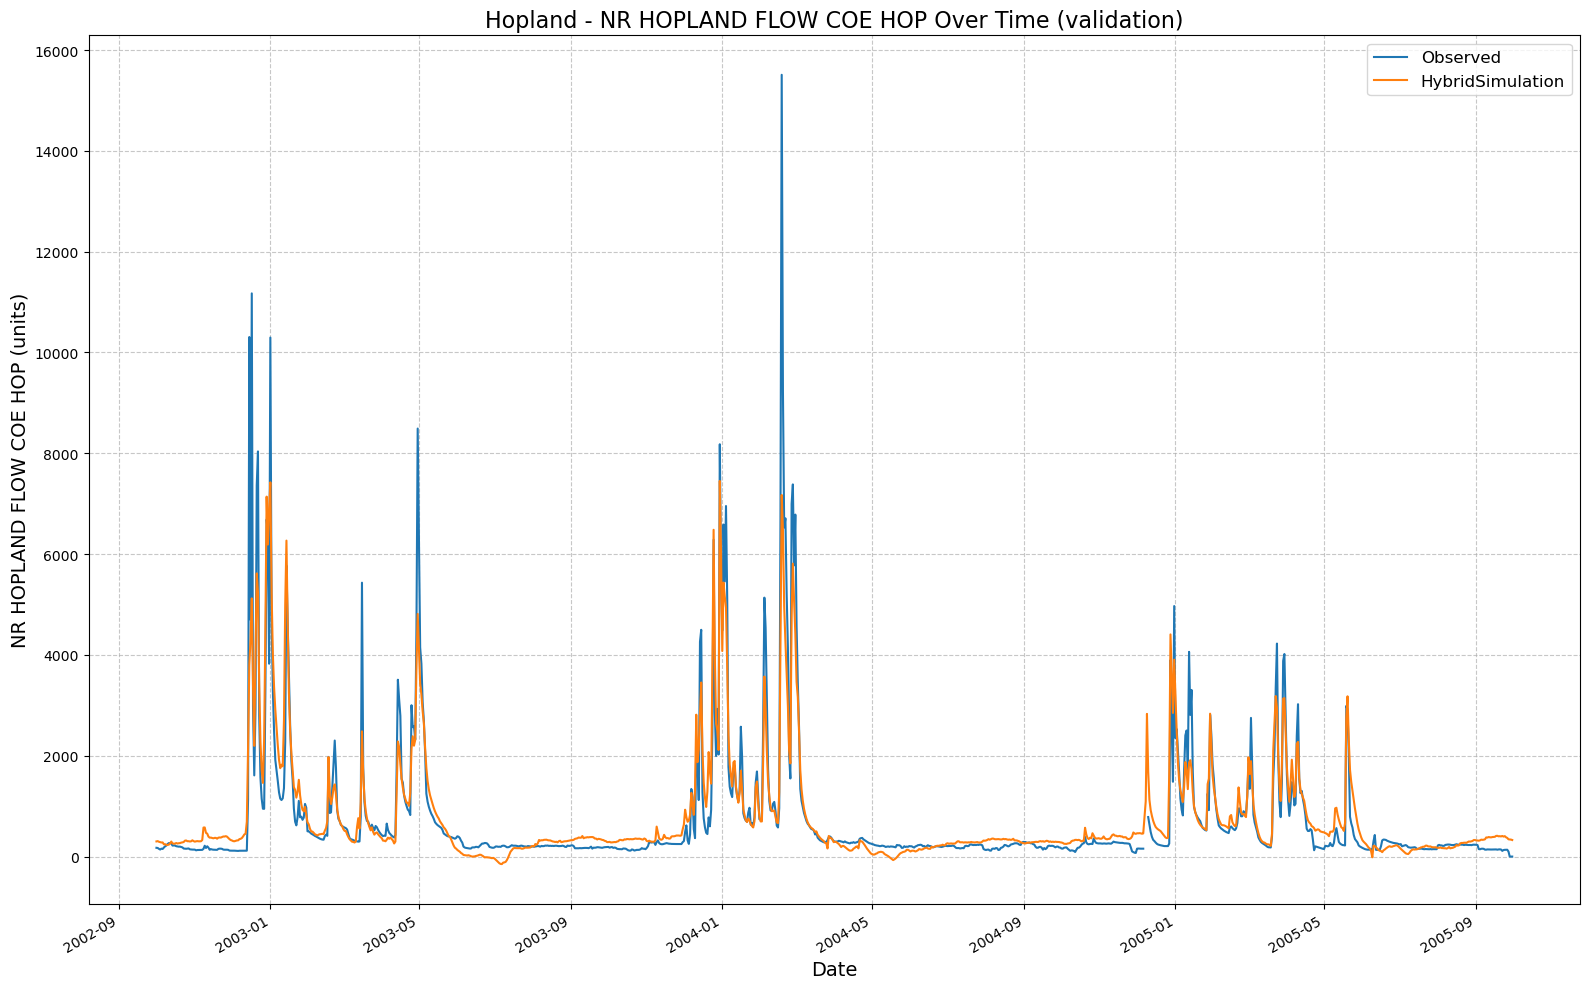

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_202504/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:40:33,904: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204033/output.log initialized.
2025-02-16 20:40:33,905: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204033
2025-02-16 20:40:33,905: ### Run configurations for testing_run
2025-02-16 20:40:33,906: experiment_name: testing_run
2025-02-16 20:40:33,906: train_basin_file: hopland
2025-02-16 20:40:33,906: validation_basin_file: hopland
2025-02-16 20:40:33,906: test_basin_file: hopland
2025-02-16 20:40:33,907: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:40:33,907: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.16it/s]
2025-02-16 20:40:34,128: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 936.44it/s]
2025-02-16 20:40:34,136: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:05<00:00,  2.20it/s, Loss: 0.0000]
2025-02-16 20:40:39,359: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.23it/s, Loss: 0.0000]
2025-02-16 20:40:44,299: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:05<00:00,  2.00it/s, Loss: 0.0000]
2025-02-16 20:40:49,816: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s, Loss: 0.0000]
2025-02-16 20:40:54,698: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.30it/s, Loss: 0.0000]
2025-02-16 20:40:59,476: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]
2025-02-16 20:43:20,244: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204033/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:43:20,247: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204033/validation/model_epoch032/validation_results.p
got predictions


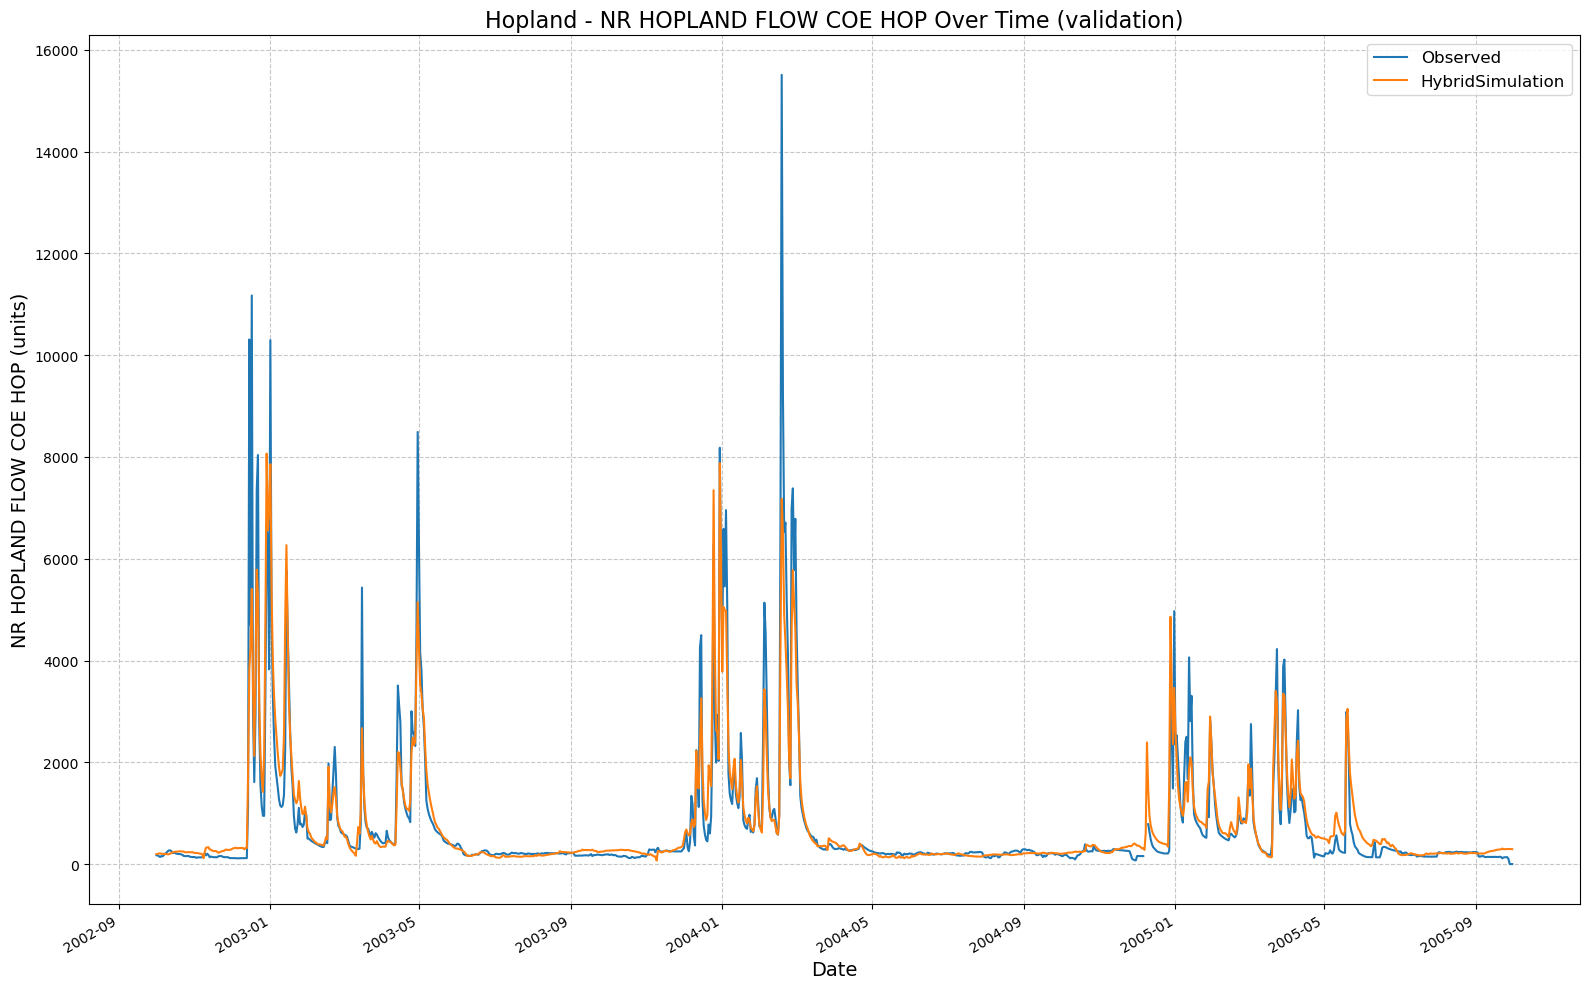

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204033/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-16 20:43:20,486: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204320/output.log initialized.
2025-02-16 20:43:20,486: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204320
2025-02-16 20:43:20,487: ### Run configurations for testing_run
2025-02-16 20:43:20,487: experiment_name: testing_run
2025-02-16 20:43:20,487: train_basin_file: hopland
2025-02-16 20:43:20,488: validation_basin_file: hopland
2025-02-16 20:43:20,488: test_basin_file: hopland
2025-02-16 20:43:20,488: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:43:20,488: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
2025-02-16 20:43:20,676: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 965.10it/s]
2025-02-16 20:43:20,683: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s, Loss: 0.0000]
2025-02-16 20:43:25,529: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s, Loss: 0.0000]
2025-02-16 20:43:30,012: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:05<00:00,  2.20it/s, Loss: 0.0000]
2025-02-16 20:43:35,024: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:05<00:00,  2.12it/s, Loss: 0.0000]
2025-02-16 20:43:40,217: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.33it/s, Loss: 0.0000]
2025-02-16 20:43:44,950: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]
2025-02-16 20:44:44,835: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204320/validation/model_epoch016/validation_metrics.csv
2025-02-16 20:44:44,836: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204320/validation/model_epoch016/validation_results.p
got predictions


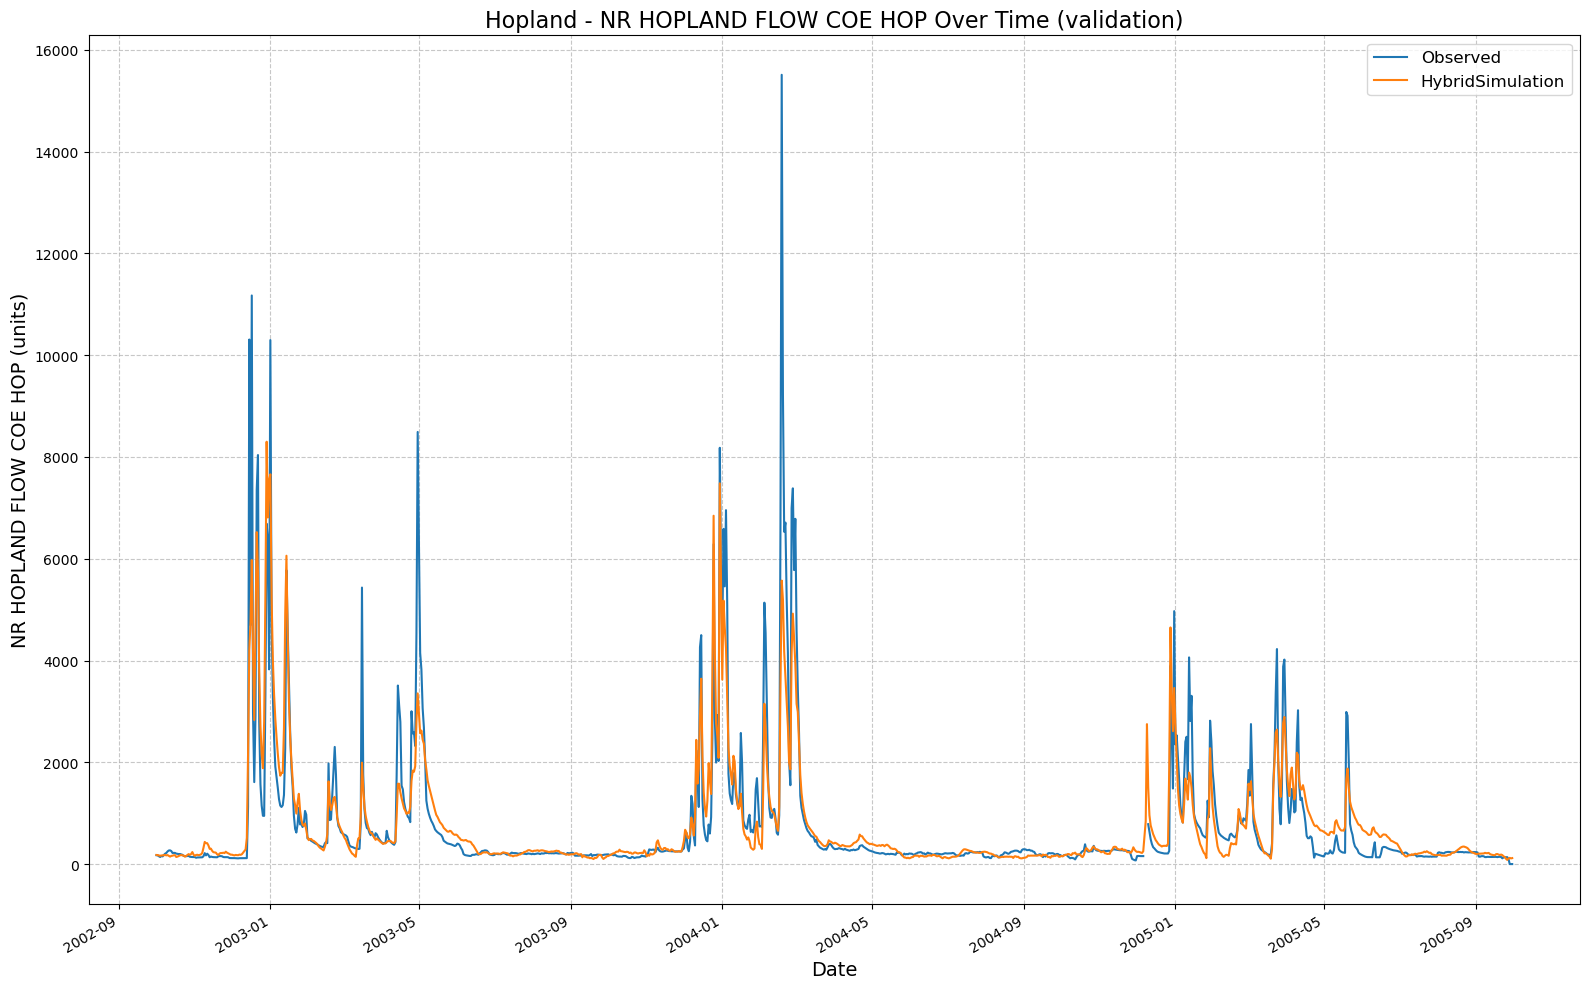

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204320/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-16 20:44:45,078: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204445/output.log initialized.
2025-02-16 20:44:45,079: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204445
2025-02-16 20:44:45,079: ### Run configurations for testing_run
2025-02-16 20:44:45,079: experiment_name: testing_run
2025-02-16 20:44:45,080: train_basin_file: hopland
2025-02-16 20:44:45,080: validation_basin_file: hopland
2025-02-16 20:44:45,080: test_basin_file: hopland
2025-02-16 20:44:45,080: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:44:45,081: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
2025-02-16 20:44:45,266: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 973.61it/s]
2025-02-16 20:44:45,273: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:05<00:00,  2.14it/s, Loss: 0.0000]
2025-02-16 20:44:50,598: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:05<00:00,  2.14it/s, Loss: 0.0000]
2025-02-16 20:44:55,754: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s, Loss: 0.0000]
2025-02-16 20:45:00,726: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.23it/s, Loss: 0.0000]
2025-02-16 20:45:05,667: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s, Loss: 0.0000]
2025-02-16 20:45:10,691: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]
2025-02-16 20:47:39,988: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204445/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:47:39,989: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204445/validation/model_epoch032/validation_results.p
got predictions


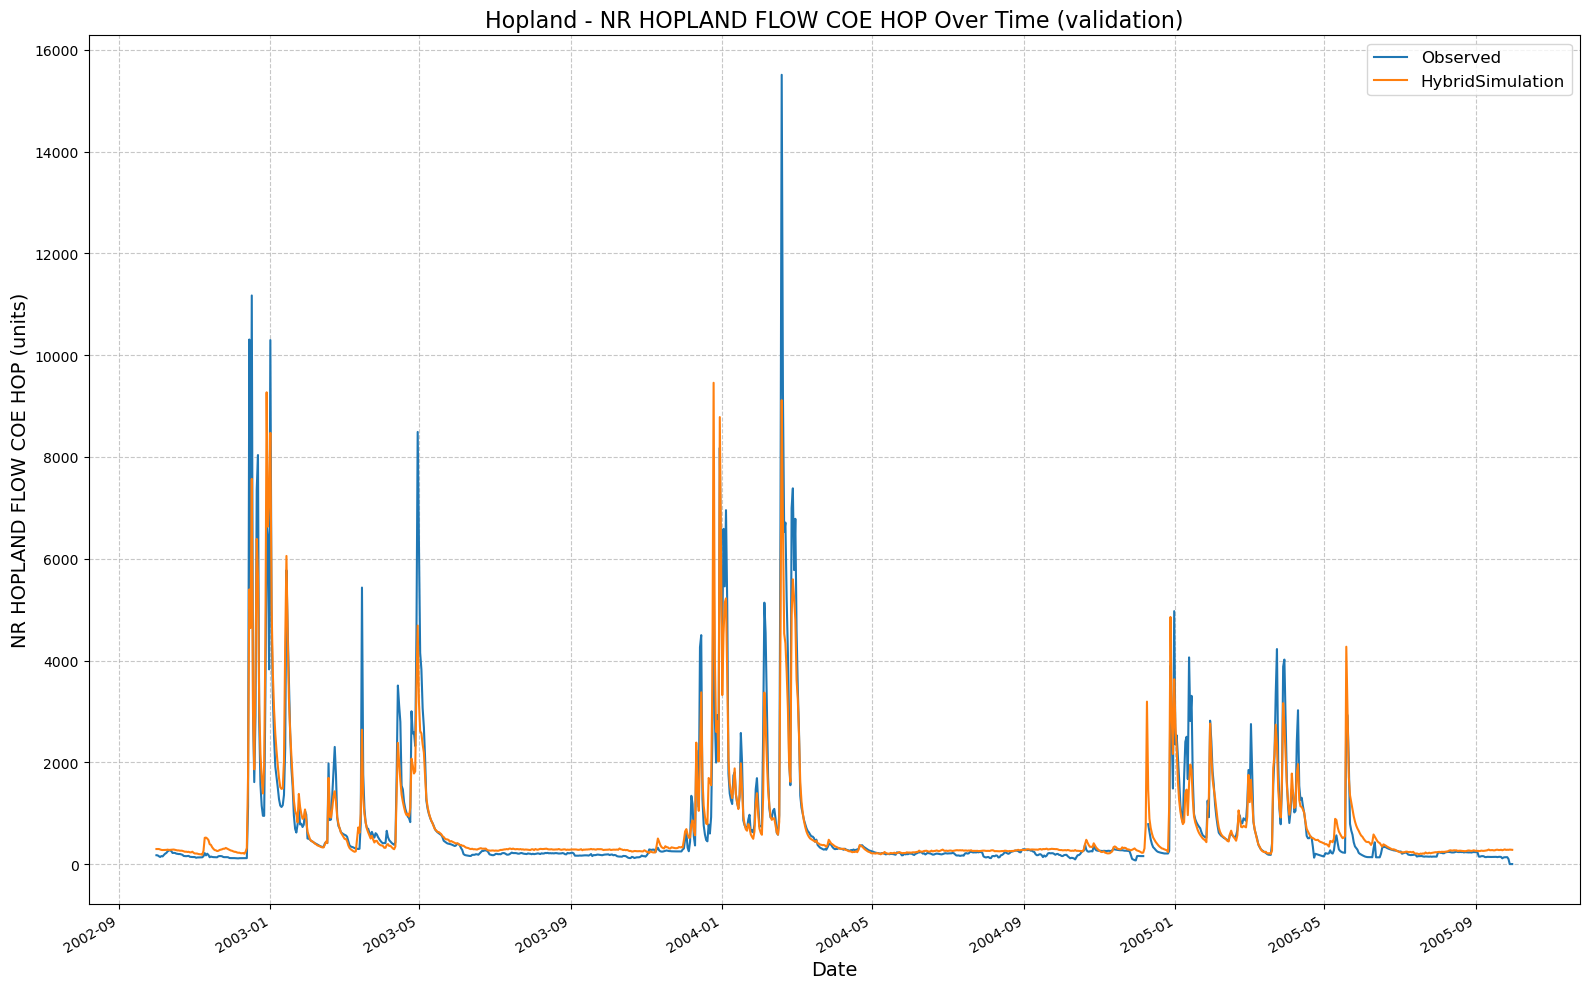

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204445/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [10]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"Physics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data,
            hourly=False,
            extend_train_period=False,
            gpu=-1
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        physics_results.append(row_data)
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping Grid-Search")

In [11]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()

    best_no_physics_params = {
        "epochs": int(best_no_phys["epochs"]),
        "hidden_size": int(best_no_phys["hidden_size"]),
        "seq_length": int(best_no_phys["seq_length"]),
        "num_layers": int(best_no_phys["num_layers"]),
        "output_dropout": float(best_no_phys["output_dropout"]),
    }

    best_physics_params = {
        "epochs": int(best_phys["epochs"]),
        "hidden_size": int(best_phys["hidden_size"]),
        "seq_length": int(best_phys["seq_length"]),
        "num_layers": int(best_phys["num_layers"]),
        "output_dropout": float(best_phys["output_dropout"]),
    }

In [16]:
if run_gridsearch:
    print(df_no_physics.iloc[0:4])
    df_no_physics.to_csv("hopland_daily_no_physics_gridsearch.csv", index=False)

hidden_size          128.000000
seq_length           180.000000
num_layers             2.000000
epochs                32.000000
output_dropout         0.400000
NSE                    0.819387
MSE               347150.531250
RMSE                 589.194816
KGE                    0.725962
Alpha-NSE              0.751381
Beta-KGE               1.085204
Beta-NSE               0.046380
Pearson-r              0.922376
FHV                  -23.345532
FMS                  -16.071892
FLV                   -3.762890
Peak-Timing            0.400000
Peak-MAPE             46.612549
Name: 0, dtype: float64


In [17]:
if run_gridsearch:
    print(df_physics.iloc[0:4])
    df_physics.to_csv("hopland_daily_physics_gridsearch.csv", index=False)

hidden_size          128.000000
seq_length            90.000000
num_layers             1.000000
epochs                32.000000
output_dropout         0.400000
NSE                    0.884513
MSE               221973.765625
RMSE                 471.140919
KGE                    0.882744
Alpha-NSE              0.908048
Beta-KGE               1.043082
Beta-NSE               0.023452
Pearson-r              0.941368
FHV                   -9.673672
FMS                    9.263467
FLV                         NaN
Peak-Timing            0.000000
Peak-MAPE             24.867139
Name: 0, dtype: float64


# Re-run validation with the best hyperparameters

In [ ]:
lstmNoPhysicsValBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_no_physics_params,
    input_features=None,
    physics_informed=False,
    physics_data_file=None,
    hourly=False,
    extend_train_period=False,
    gpu=-1
)
lstmNoPhysicsValBest.train()
no_physics_val_csv, no_physics_val_metrics = lstmNoPhysicsValBest.results()
no_physics_val_metrics

In [ ]:
lstmPhysicsValBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_physics_params,
    input_features=features_with_physics,
    physics_informed=True,
    physics_data_file=path_to_physics_data,
    hourly=False,
    extend_train_period=False,
    gpu=-1
)
lstmPhysicsValBest.train()
physics_val_csv, physics_val_metrics = lstmPhysicsValBest.results()
physics_val_metrics

In [ ]:
combinedPlot(
    lstm_results=no_physics_val_csv,
    lstmPhysics_results=physics_val_csv,
    HMS_results=path_to_physics_data,
    title="Hopland Basin Daily Model Comparison (Validation)",
    fName="hopland_daily_val_metrics.csv",
    plot_filename="hopland_daily_val_model_comparison.png"
)

In [ ]:
fancyCombinedPlot(
    lstm_results=no_physics_val_csv,
    lstmPhysics_results=physics_val_csv,
    HMS_results=path_to_physics_data,
    title='Hopland Basin Daily Model Comparison (Validation)',
    fName="hopland_daily_val_metrics.csv"
)

# Re-run testing with the best hyperparameters

2025-02-16 20:47:40,248: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/output.log initialized.
2025-02-16 20:47:40,249: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740
2025-02-16 20:47:40,249: ### Run configurations for testing_run
2025-02-16 20:47:40,249: experiment_name: testing_run
2025-02-16 20:47:40,249: train_basin_file: hopland
2025-02-16 20:47:40,250: validation_basin_file: hopland
2025-02-16 20:47:40,250: test_basin_file: hopland
2025-02-16 20:47:40,250: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:47:40,250: train_end_date: 2005-09-30 00:00:00
2025-02-16 20:47:40,251: validation_start_date: 2002-10-01 00:00:00
2025-02-16 20:47:40,251: validation_end_date: 2005-09-30 00:00:00
2025-02-16 20:47:40,251: test_start_date: 2005-10-01 00:00:00
2025-02-16 20:47:40,251: test_end_date: 2009-09-29 00:00:00
2025-02-16 20:47:40,252: dev

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
2025-02-16 20:49:34,648: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:49:34,650: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/validation/model_epoch032/validation_results.p
2025-02-16 20:49:34,657: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/model_epoch032.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
2025-02-16 20:49:35,534: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/test/model_epoch032/test_metrics.csv
2025-02-16 20:49:35,535: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/test/model_epoch032/test_results.p
got predictions


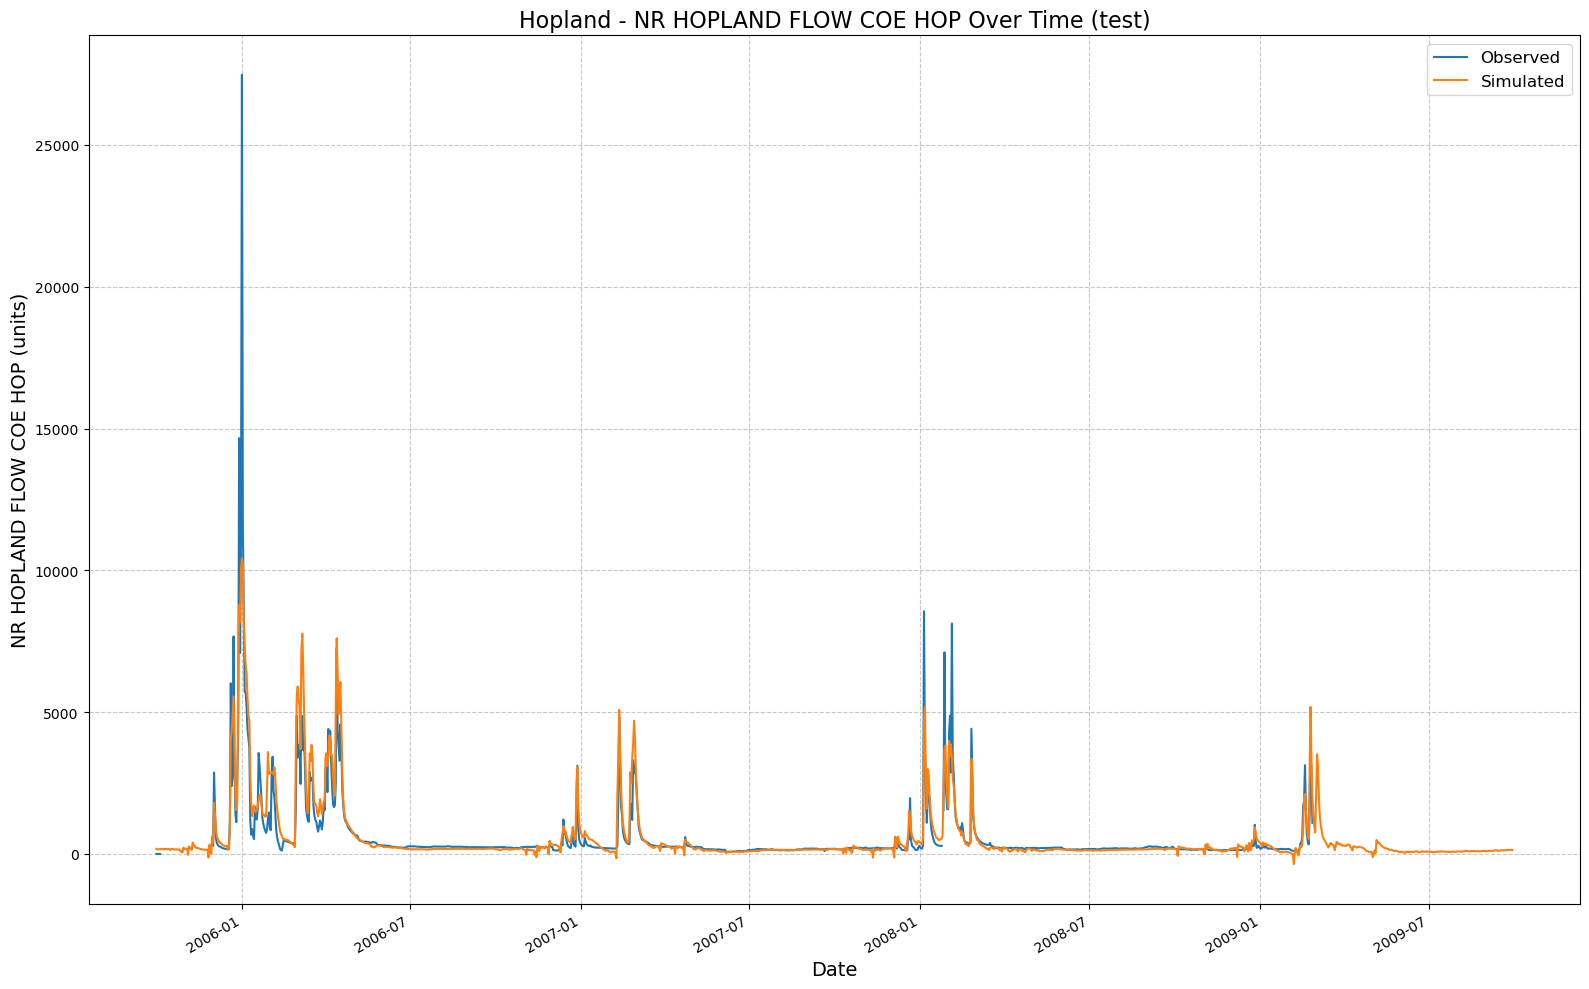

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204740/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.7565023303031921,
 'MSE': 481921.1875,
 'RMSE': 694.2054360922277,
 'KGE': 0.8229802850338732,
 'Alpha-NSE': 0.9035826885240211,
 'Beta-KGE': 1.0734000205993652,
 'Beta-NSE': 0.03160956118258787,
 'Pearson-r': 0.870956912194238,
 'FHV': -8.684946596622467,
 'FMS': 55.453163479781985,
 'FLV': 4.153324229482618,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 30.81875085830689}

In [12]:
hoplandNoPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,  
    hyperparams=best_no_physics_params,
    input_features=None,
    physics_informed=False,
    physics_data_file=None,
    hourly=False,
    extend_train_period=True, 
    gpu=-1
)

hoplandNoPhysicsExtBest.train()
no_physics_test_csv, no_physics_test_metrics = hoplandNoPhysicsExtBest.results('test')
no_physics_test_metrics

2025-02-16 20:49:35,759: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/output.log initialized.
2025-02-16 20:49:35,759: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935
2025-02-16 20:49:35,760: ### Run configurations for testing_run
2025-02-16 20:49:35,760: experiment_name: testing_run
2025-02-16 20:49:35,761: train_basin_file: hopland
2025-02-16 20:49:35,761: validation_basin_file: hopland
2025-02-16 20:49:35,761: test_basin_file: hopland
2025-02-16 20:49:35,762: train_start_date: 1994-10-01 00:00:00
2025-02-16 20:49:35,762: train_end_date: 2005-09-30 00:00:00
2025-02-16 20:49:35,762: validation_start_date: 2002-10-01 00:00:00
2025-02-16 20:49:35,763: validation_end_date: 2005-09-30 00:00:00
2025-02-16 20:49:35,763: test_start_date: 2005-10-01 00:00:00
2025-02-16 20:49:35,763: test_end_date: 2009-09-29 00:00:00
2025-02-16 20:49:35,764: dev

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]
2025-02-16 20:50:36,140: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/validation/model_epoch032/validation_metrics.csv
2025-02-16 20:50:36,142: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/validation/model_epoch032/validation_results.p
2025-02-16 20:50:36,157: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/model_epoch032.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]
2025-02-16 20:50:36,729: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/test/model_epoch032/test_metrics.csv
2025-02-16 20:50:36,730: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/test/model_epoch032/test_results.p
got predictions


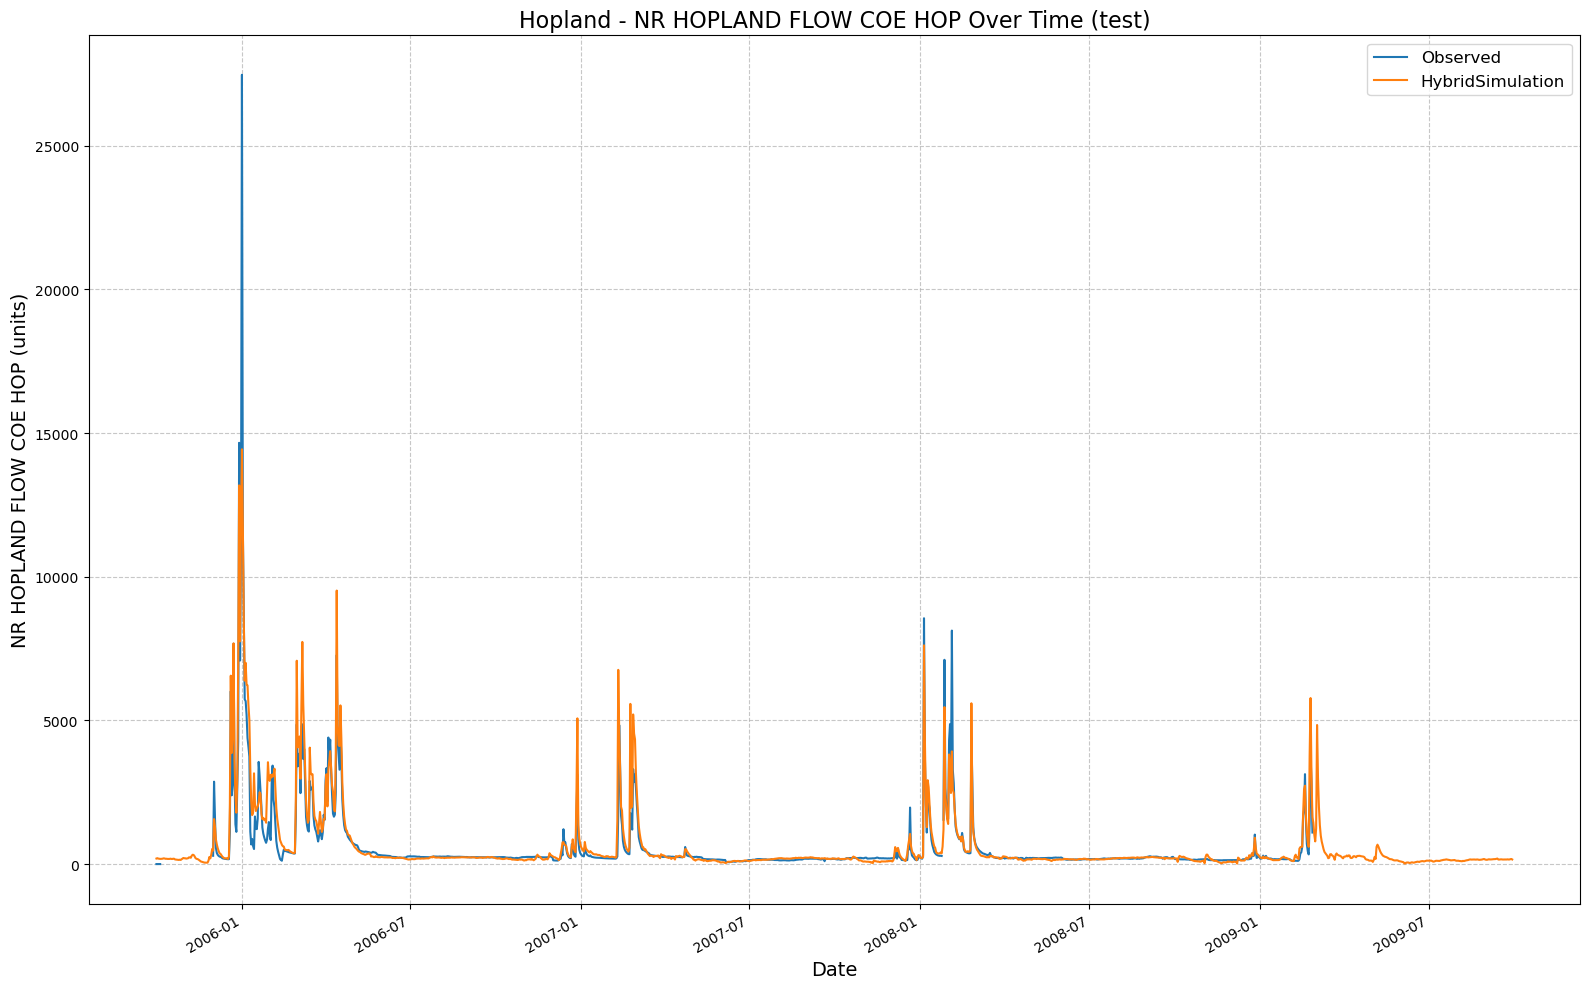

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1602_204935/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.834426537156105,
 'MSE': 327696.625,
 'RMSE': 572.447923395657,
 'KGE': 0.8581597370871905,
 'Alpha-NSE': 0.9779044600113634,
 'Beta-KGE': 1.1127287149429321,
 'Beta-NSE': 0.048546412044227695,
 'Pearson-r': 0.9167973310337906,
 'FHV': 1.815529726445675,
 'FMS': 30.379281525246853,
 'FLV': 86.09639885414423,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 29.66576099395752}

In [13]:
hoplandPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,  
    hyperparams=best_physics_params,
    input_features=features_with_physics,
    physics_informed=True,
    physics_data_file=path_to_physics_data,
    hourly=False,
    extend_train_period=True,
    gpu=-1
)

hoplandPhysicsExtBest.train()
physics_test_csv, physics_test_metrics = hoplandPhysicsExtBest.results('test')
physics_test_metrics

In [ ]:
combinedPlot(
    lstm_results=no_physics_test_csv,
    lstmPhysics_results=physics_test_csv,
    HMS_results=path_to_physics_data,
    title="Hopland Basin Daily Model Comparison (Test)",
    fName="hopland_daily_metrics.csv",
    plot_filename="hopland_daily_model_comparison.png"
)

In [15]:
fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Hopland Basin Daily Model Comparison', fName = "hopland_daily_metrics.csv")

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USA

HMS           LSTM  Physics_Informed_LSTM
NSE               0.795548       0.756782               0.834427
MSE          404643.883879  481367.118426          327696.621712
RMSE            636.116250     693.806254             572.447921
KGE               0.728187       0.822132               0.858160
Alpha-NSE         1.186227       0.903146               0.977904
Beta-KGE          1.185632       1.075147               1.112729
Beta-NSE          0.079942       0.032362               0.048546
Pearson-r         0.931134       0.871123               0.916797
FHV              23.945896      -8.684947               1.815530
FMS              30.814334      55.453121              30.379233
FLV              96.352301       4.153327              89.132361
Peak-Timing       0.250000       0.250000               0.250000
Peak-MAPE        36.378148      30.818749              29.665763